In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import folium

In [2]:
raw_data=pd.read_csv(r"C:\Users\theo\Desktop\Projet 4\2016_Building_Energy_Benchmarking.csv")
project_path = r"C:\Users\theo\Desktop\Projet 4"
Files_csv= [raw_data]
Files_csv_names=["raw_data"]
pd.reset_option('display.float_format')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', -1)

C:\Users\theo\AppData\Local\Temp\ipykernel_14144\3503006680.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
display(raw_data.shape)

(3376, 46)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
raw_data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [7]:
Files_csv = [raw_data]  
Files_csv_names = ["raw_data"]  

Files_description = pd.DataFrame(columns=["rows", "columns", "filling rate", "duplicated data", "contenu"], index=[Files_csv_names])

if len(Files_csv) == 1:
    File = Files_csv[0]
    Files_description.loc[Files_csv_names[0], "rows"] = [len(File.index)]
    Files_description.loc[Files_csv_names[0], "columns"] = [len(File.columns)]
    Files_description.loc[Files_csv_names[0], "filling rate"] = [str((File.notna().mean().mean() * 100).round(1)) + "%"]
    Files_description.loc[Files_csv_names[0], "duplicated data"] = [File.duplicated().sum()]
    Files_description["contenu"] = ["Données sur les batiments de la ville de Seattle"]

Files_description


C:\Users\theo\AppData\Local\Temp\ipykernel_14144\782049477.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Files_description.loc[Files_csv_names[0], "rows"] = [len(File.index)]
C:\Users\theo\AppData\Local\Temp\ipykernel_14144\782049477.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Files_description.loc[Files_csv_names[0], "columns"] = [len(File.columns)]
C:\Users\theo\AppData\Local\Temp\ipykernel_14144\782049477.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead

,rows,columns,filling rate,duplicated data,contenu
raw_data,3376,46,87.2%,0,Données sur les batiments de la ville de Seattle


<span style="font-size: 30px;">Missing Data</span>

C:\Users\theo\AppData\Local\Temp\ipykernel_14144\3430333416.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray', len(sorted_columns) + 1)


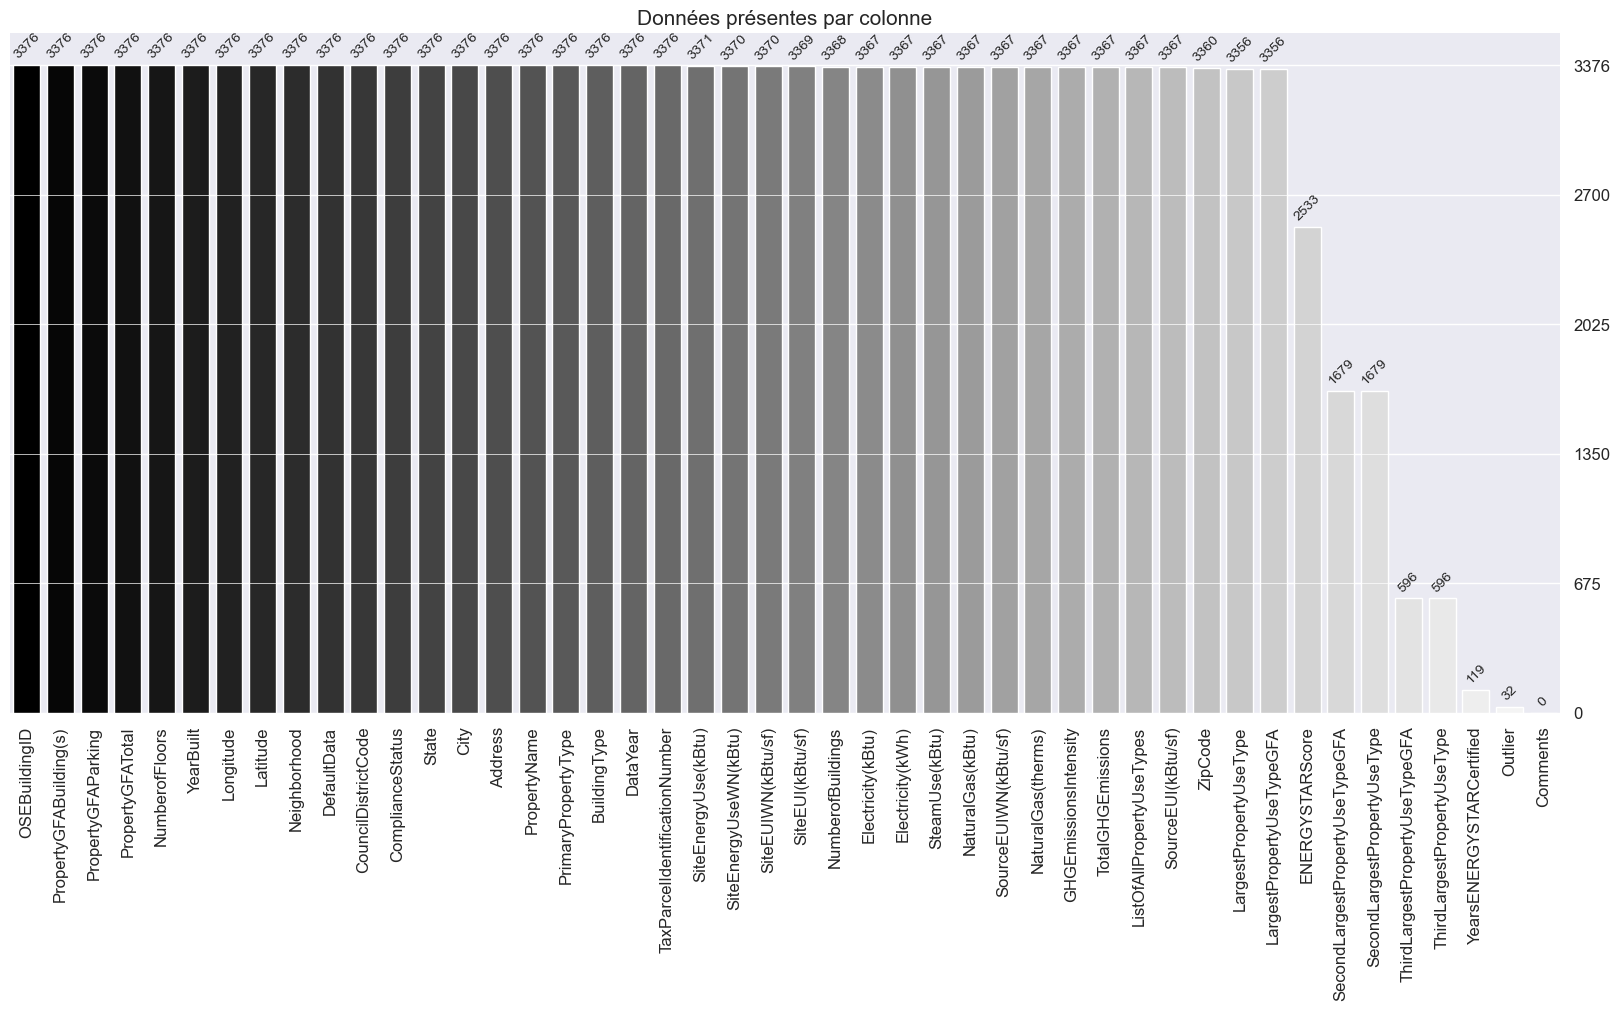

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

missing_counts = raw_data.isna().sum()
sorted_columns = missing_counts.sort_values(ascending=True).index

sns.set(style="darkgrid")

plt.figure(figsize=(20, 1))
plt.title("Données présentes par colonne", size=15)

fill_percentages = [0, 675, 1350, 2025, 2700, 3376]

cmap = plt.cm.get_cmap('gray', len(sorted_columns) + 1)

plot = sns.barplot(y=raw_data.shape[0] - raw_data[sorted_columns].isna().sum().values, x=sorted_columns, palette=[cmap(i) for i in range(len(sorted_columns))])

plot.set_xticklabels(sorted_columns, rotation=90, size=12)

custom_labels = [0, 675, 1350, 2025, 2700, 3376]
plot.tick_params(axis='y', labelright=True)
plot.set_yticks(custom_labels)
plot.set_yticklabels([str(label) for label in custom_labels], size=12)
plot.tick_params(axis="y", labelleft=False)

plt.subplots_adjust(top=7, bottom=0.2) 
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

for i, bar in enumerate(plot.patches):
    height = bar.get_height()
    plot.annotate(str(int(height)), rotation=45, xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords="offset points",
                  ha='center', va='bottom', size=10)
for label in custom_labels[1:]:
    plot.axhline(label, color='white', linestyle='-', linewidth=0.5)

plt.show()


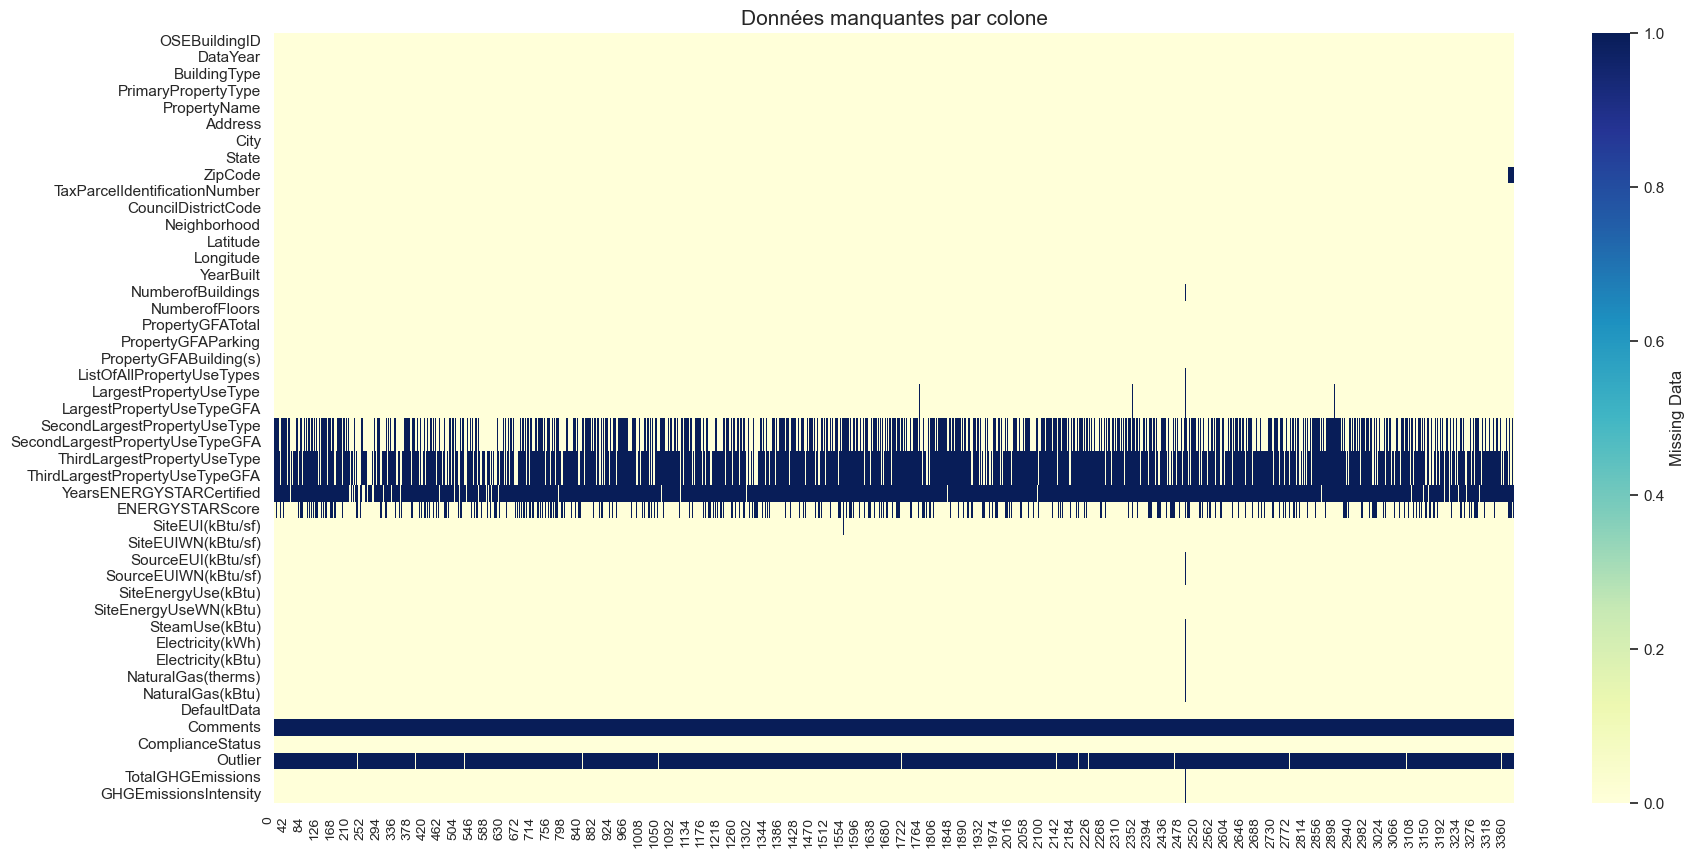

In [35]:
plt.figure(figsize=(20,10))
plt.title("Données manquantes par colone", size=15)
ax = sns.heatmap(raw_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10) 
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


<span style="font-size: 20px;">Création d'une copie et nettoyage des données</span>

In [36]:
build_df = raw_data.copy()

columns_to_remove = []

print(build_df.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

Nous avons déjà observé les données dupliquées mais nous pouvons toujours vérifier si des ID de batiments sont dupliqués pour la suite:

In [16]:
duplicates = build_df.duplicated(subset=['OSEBuildingID'])

print(str(build_df[duplicates].size) + " duplicates found in the OSEBuildingID column.")

0 duplicates found in the OSEBuildingID column.


Il n'y en a pas donc nous pouvons commencer par retirer cette colonne du df car la variable ne va pas être utile pour la suite.

In [17]:
columns_to_remove.append('OSEBuildingID')

Notre étude porte sur un certain type de batiments alors il faut les trier

B̲u̲i̲l̲d̲i̲n̲g̲T̲y̲p̲e


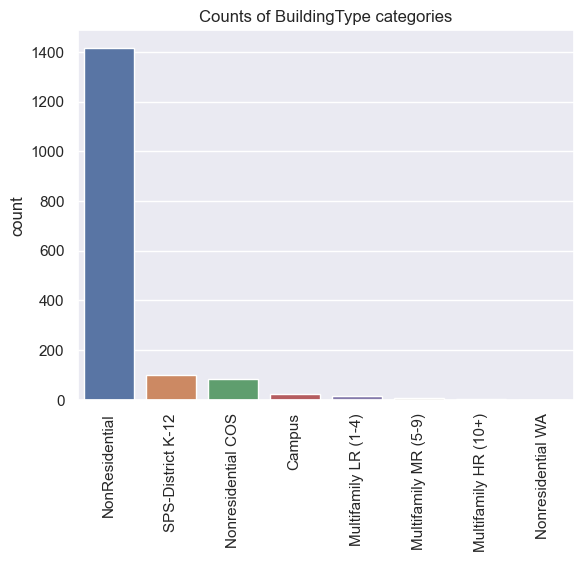




P̲r̲i̲m̲a̲r̲y̲P̲r̲o̲p̲e̲r̲t̲y̲T̲y̲p̲e
                             PrimaryPropertyType
Small- and Mid-Sized Office  293                
Other                        256                
Warehouse                    187                
Large Office                 173                
K-12 School                  139                
Mixed Use Property           133                
Retail Store                 91                 
Hotel                        77                 
Worship Facility             71                 
Distribution Center          53                 
Supermarket / Grocery Store  40                 
Medical Office               39                 
Self-Storage Facility        28                 
University                   25                 
Refrigerated Warehouse       12                 
Restaurant                   12                 
Hospital                     10                 
Laboratory                   10                 
Office                      

In [59]:
building_type_columns = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

for col in building_type_columns:

    print('\u0332'.join(col))

    if build_df[col].nunique() > 10:
        print(build_df[col].value_counts().to_frame())
    else:
        countplot = sns.countplot(x=col, data=build_df, order=build_df[col].sort_values().value_counts().index,)
        plt.xticks(rotation=90)
        plt.title("Counts of " + col + " categories")
        plt.xlabel("")
        plt.show()

    print("\n\n")


Les catégories présentées dans les données ne sont pas réellement exploitables en l'état alors nous pouvons/devons les retrier pour les classer de manière plus pratique.  
à savoir des batiments:
* residentiels
* éducatifs
* bureaux
* magasins
* médicaux
* restauration
* religieux
* culturels
* de service
* industriels
* hotels
* autres  

Pour cela nous pouvons créer un nouveau dictionnaire pour y regrouper les catégories existantes

In [38]:
building_type_dict = {
    "résidentiels": ['Low-Rise Multifamily', 'Mid-Rise Multifamily', 'High-Rise Multifamily', 'Senior Care Community',
                    'Residence Hall', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential', 
                    'Residential Care Facility'],
    
    "éducatifs": ['K-12 School', 'University', 'College/University', 'Other - Education', 'Adult Education', 
                  'Pre-school/Daycare', 'Vocational School'],
    
    "bureaux": ['Small- and Mid-Sized Office', 'Large Office', 'Office', 'Financial Office', 'Bank Branch'],
    
    "magasins": ['Retail Store', 'Supermarket/Grocery Store', 'Supermarket / Grocery Store', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
               'Strip Mall', 'Automobile Dealership', 'Other - Services', 'Other - Mall', 'Wholesale Club/Supercenter', 
               'Enclosed Mall', 'Convenience Store without Gas Station'],
    
    "médicaux":['Medical Office', 'Hospital', 'Laboratory', 'Hospital (General Medical & Surgical)', 
                   'Urgent Care/Clinic/Other Outpatient', 'Other/Specialty Hospital'],
    
    "restauration":['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Bar/Nightclub', 'Food Sales', 'Fast Food Restaurant'],
    
    "religieux": ['Worship Facility'],
    
    "culturels": ['Other - Recreation', 'Other - Entertainment/Public Assembly', 'Social/Meeting Hall', 'Museum',
                'Fitness Center/Health Club/Gym', 'Library', 'Performing Arts', 'Lifestyle Center', 'Convention Center',
                'Movie Theater', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Swimming Pool'],
    
    "service": ['Parking', 'Prison/Incarceration', 'Other - Public Services', 'Fire Station', 'Police Station', 'Courthouse'],
    
    "industries": ['Warehouse', 'Distribution Center', 'Self-Storage Facility', 'Refrigerated Warehouse', 
                   'Non-Refrigerated Warehouse', 'Manufacturing/Industrial Plant', 'Data Center', 'Other - Technology/Science'],
    
    "hoteliers": ['Hotel'],
    
    "autres": ['Other', 'Mixed Use Property', 'Other - Utility']

    
}

In [39]:
def type_to_new_category(current_type, **dictionary):
    new_type = 'NOT_FOUND'

    if (type(current_type) == int) or (type(current_type) == float):
        new_type = 'Other'
    else:
        for dict_type, dict_type_list in dictionary.items():
            if current_type in dict_type_list:
                new_type = dict_type
                break
        
    return new_type


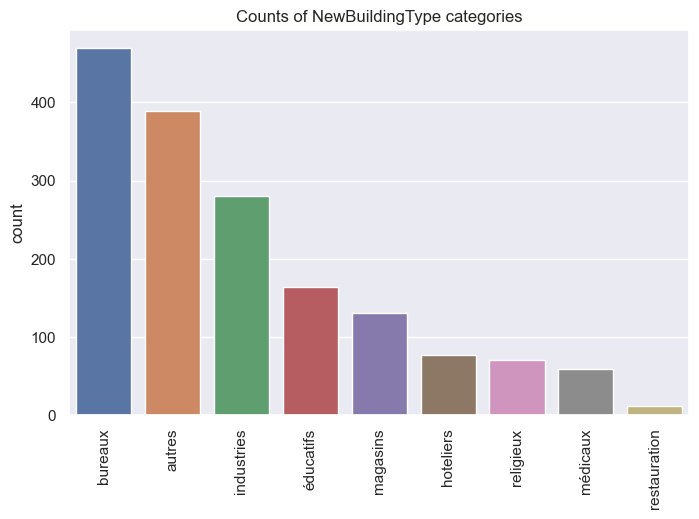

In [58]:
new_type_col = 'NewBuildingType'

build_df[new_type_col] = build_df['PrimaryPropertyType'].apply(type_to_new_category, **building_type_dict)

plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

Nous pouvons aussi appliquer ce dictionnaire sur l'indicateur "LargestPropertyUseType" car l'utilisation d'un batiment peut largement être représentée par l'utilisation qui est faite par plus de 50% de sa surface.

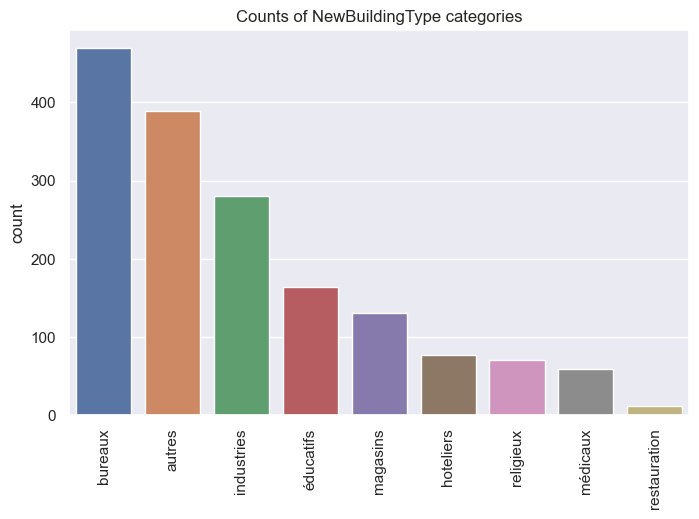

In [57]:
other_index = build_df[build_df[new_type_col] == 'Other'].index

build_df.loc[other_index, new_type_col] = build_df.loc[other_index, 'LargestPropertyUseType'].apply(type_to_new_category, **building_type_dict)

plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

On sait que les batiments résidentiels ne font pas partie de l'étude alors on peut les oter

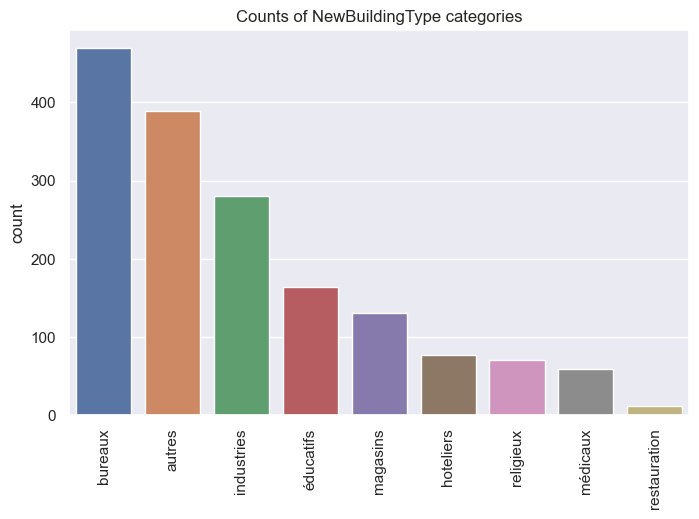

In [56]:
build_df = build_df[~(build_df[new_type_col] == 'résidentiels')]

plt.figure(figsize=(8,5))
countplot = sns.countplot(x=new_type_col, data=build_df, order=build_df[new_type_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + new_type_col + " categories")
plt.xlabel("")
plt.show()

In [44]:
nonres_n = build_df[build_df['BuildingType'].str.contains('nonresidential', flags=re.IGNORECASE)].size
print("{0:.0%} des batiments sont 'non-résidentiels'".format(nonres_n/build_df.size))
print(build_df["NewBuildingType"].unique())

91% des batiments sont 'non-résidentiels'
['hoteliers' 'autres' 'éducatifs' 'bureaux' 'industries' 'médicaux'
 'magasins' 'religieux' 'restauration']


Maintenant qu'ils sont triés cette colonne n'est plus nécessaire

In [45]:
columns_to_remove.extend(building_type_columns)

<span style="font-size: 20px;">Localisation des batiments</span>

In [46]:
building_adress_columns = ['Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
                           'CouncilDistrictCode', 'Neighborhood', 'Longitude', 'Latitude']

for col in building_adress_columns:
    display(build_df[col].describe())
    print("\n")

count     1652             
unique    1631             
top       2600 SW Barton St
freq      4                
Name: Address, dtype: object

count     1652   
unique    1      
top       Seattle
freq      1652   
Name: City, dtype: object

count     1652
unique    1   
top       WA  
freq      1652
Name: State, dtype: object

count    1636.000000 
mean     98116.644254
std      18.027620   
min      98006.000000
25%      98105.000000
50%      98109.000000
75%      98122.000000
max      98199.000000
Name: ZipCode, dtype: float64

count     1652      
unique    1575      
top       0925049346
freq      5         
Name: TaxParcelIdentificationNumber, dtype: object

count    1652.000000
mean     4.366828   
std      2.205069   
min      1.000000   
25%      2.000000   
50%      4.000000   
75%      7.000000   
max      7.000000   
Name: CouncilDistrictCode, dtype: float64

count     1652    
unique    19      
top       DOWNTOWN
freq      362     
Name: Neighborhood, dtype: object

count    1652.000000
mean    -122.333329 
std      0.024566   
min     -122.411820 
25%     -122.343700 
50%     -122.333170 
75%     -122.321953 
max     -122.258640 
Name: Longitude, dtype: float64

count    1652.000000
mean     47.615622  
std      0.047979   
min      47.499170  
25%      47.585160  
50%      47.612295  
75%      47.648868  
max      47.733870  
Name: Latitude, dtype: float64

Les colonnes "City" et "State" ne possèdent qu'une seule valeur unique car cette étude concèrne bien la ville seule de Seattle et donc l'état dans lequelle elle se trouve (Washington).  
Je vais donc me permettre de les retirer.  
Tout comme les colonnes "Address", "ZipCode", "TaxParcelIdentificationNumber" et "CouncilDistrictCode" que je retire car les données sont peu pertinentes contrairement au "Neighborhood" (quartier) qui lui permet un regroupement des adresses.

In [47]:
columns_to_remove.extend(['City', 'State', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode'])

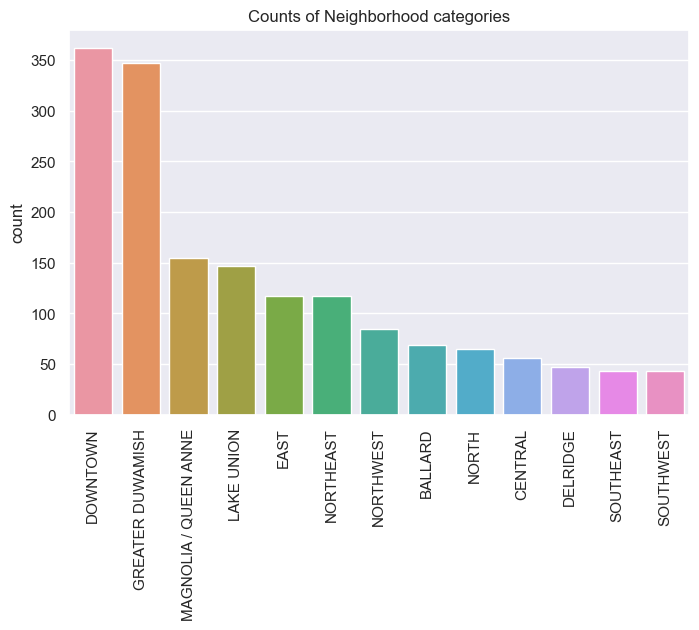

In [55]:
nbhd_col = 'Neighborhood'

# Show Neighborhood values
plt.figure(figsize=(8,5))
countplot = sns.countplot(x=nbhd_col, data=build_df, order=build_df[nbhd_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of " + nbhd_col + " categories")
plt.xlabel("")
plt.show()

Comme on peut le remarquer, il y a des quartiers qui apparaissent deux fois, voir même 3 parce que tous ne sont pas au même format. Remedions à cela:

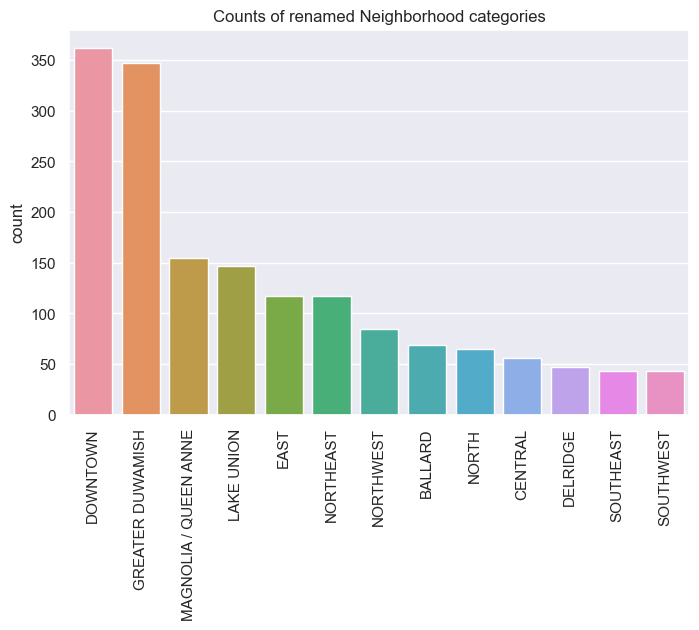

In [54]:
build_df[nbhd_col] = build_df[nbhd_col].str.upper()


build_df[nbhd_col] = build_df[nbhd_col].replace({'DELRIDGE NEIGHBORHOODS':'DELRIDGE'})


plt.figure(figsize=(8,5))
countplot = sns.countplot(x=nbhd_col, data=build_df, order=build_df[nbhd_col].sort_values().value_counts().index)
plt.xticks(rotation = 90)
plt.title("Counts of renamed " + nbhd_col + " categories")
plt.xlabel("")
plt.show()

Les colonnes suivantes sont dédiées à la longitude et latitude, il n'y a pas d'outliers tous les batiments semblent bien être situés à Seattle

Ensuite, il s'agit de la colonne notifiant l'année de construction des batiments. Nous allons réutiliser cette colonne afin d'afficher "l'age" des batiments et non leur année de fabrication pour rendre le tout plus visuel et plus utilisable.

In [50]:
current_year = 2016


build_df['Age'] = current_year - build_df['YearBuilt']


build_df['Age'] = build_df['Age'].astype('int32')

columns_to_remove.append('YearBuilt')

print(build_df['Age'].unique())

[ 89  20  47  90  36  17 112  18  88  94  12  86  33 109 100  31  55  15
  25  61  38  67  27 110  22  24  26  66 116  62 105  43  96 106  34 108
  57  16  19  54   8  68  51  87   6  78  30  46  14  93  13  59  52  75
  53  10 101  58   7   5  45   9  65  63  64  56  79  50  48  91  92  11
  85  44 102  21  35  40 107  28  37  69  32  60 104  39  95 103  71  42
  41  70  49  29  76  84  23  98 111 114  77  72  99  74 113   4   3  97
 115  80  81   2   1]


Vient après les données sur les constructions elles mêmes, à savoir le nombre de batiments sur la propriété et le nombre d'étages de ceux-ci.

In [51]:
building_elem_columns = ['NumberofBuildings', 'NumberofFloors']
build_df[building_elem_columns] = build_df[building_elem_columns].astype('Int32')



display(build_df[building_elem_columns].describe())

,NumberofBuildings,NumberofFloors
count,1650.0,1652.0
mean,1.172121,4.148305
std,2.946369,6.607022
min,0.0,0.0
25%,1.0,1.0
50%,1.0,2.0
75%,1.0,4.0
max,111.0,99.0


On peut observer que le minumum est à 0 pour les deux colonnes ce qui est certainement une erreur (de formatage ou autre).  
Tout d'abord nous parlons depuis le début de batiments, donc il est impossible que des propriétés soient à 0 batiments sinon elles ne figureraient pas les données de l'étude. Affichons les et vérifions.

In [505]:
display(build_df[build_df['NumberofBuildings'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])
display(len(build_df[build_df['NumberofBuildings'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']]))

,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
63,Polyclinic North && South,1200 Harvard Ave,0,3,1965
76,KCTS9,401 Mercer St,0,2,1986
160,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,0,4,1916
201,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,0,3,1968
241,University District Office Buiding,1107 NE 45th St,0,5,1961
264,Thaw Building,8300 Military Rd South,0,1,1970
278,Fourth and Pike Building,1424 4th Ave,0,10,1926
280,Motif Seattle,1414 4th Ave,0,19,1973
291,Meridian (East),1501 7th Ave,0,4,1996
358,Westbridge,4209 W Marginal Way SW,0,1,1955


52

52 batiments à vérifier manuellement ça commence à faire alors vérifions en seulement quelques uns.  
Après vérification, les adresses que j'ai observées sont toutes présentes avec 1 batiment, je pars donc du principe que c'était bien une erreur de formatage.

In [506]:
build_df['NumberofBuildings'] = build_df['NumberofBuildings'].replace(0, 1)

Maintenant observons les batiments avec 0 étage

In [507]:
display(build_df[build_df['NumberofFloors'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])
display(len(build_df[build_df['NumberofFloors'] == 0][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']]))

,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
166,Grand Hyatt Seattle,721 Pine St,1,0,1999
487,Arnold Pavilion,1221 Madison Street,1,0,2004
488,2200 Westlake - SEDO,2200 Westlake Ave.,1,0,2006
564,Pacific Place,600 Pine Street,1,0,1999
1754,HART First Hill LLC,1124 Columbia Street,1,0,1945
1993,(ID#24086)Campus1:KC Metro Transit Atlantic Central Bases,1333 AIRPORT WAY S,10,0,1991
3130,Sandpoint #5,7561 63rd Ave NE,1,0,1940
3131,Sandpoint #25,6222 NE 74th St,1,0,1960
3132,Sandpoint #29,6200 NE 74th ST,1,0,1960
3168,Magnuson,7400 Sand Point Way NE,8,0,1929


12

Il n'y en a que 12, tous les vérifier sera plus simple.  
Après vérifications, je peux constater qu'ici il s'agit d'une erreur lors du remplissage des données car les nombres peuvent varier.  
Je vais appliquer les modifications directement dans la colonne.

In [508]:
# Grand Hyatt Seattle
build_df.loc[[166],'NumberofFloors'] = 30

# Arnold Pavilion
build_df.loc[[487],'NumberofFloors'] = 12

# 2200 Westlake, Pacific Place, Sandpoint #29
build_df.loc[[488, 564, 3132],'NumberofFloors'] = 3

# HART First Hill LLC
build_df.loc[[1754],'NumberofFloors'] = 7

# KC Metro Transit Atlantic
build_df.loc[[1993],'NumberofFloors'] = 1

# Sandpoint #5, Sandpoint #25, Magnuson, Smilow Rainier Vista Boys & Girls Club
build_df.loc[[3130, 3131, 3168, 3273],'NumberofFloors'] = 2

# University of Washington
build_df.loc[[3274],'NumberofFloors'] = 4

In [509]:
display(build_df[building_elem_columns].describe())

,NumberofBuildings,NumberofFloors
count,1650.0,1652.0
mean,1.203636,4.191283
std,2.938998,6.632681
min,1.0,1.0
25%,1.0,1.0
50%,1.0,2.0
75%,1.0,4.0
max,111.0,99.0


J'aimerai de plus vérifier les outliers, car 111 batiments c'est beaucoup et 99 étages aussi ce n'est pas négligeable.  
Donc je prends une marge à partir de 50 pour les vérifier.

In [510]:
display(build_df[build_df['NumberofBuildings']>50][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])
display(build_df[build_df['NumberofFloors']>50][['PropertyName', 'Address', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt']])


,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
3274,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,111,4,1900


,PropertyName,Address,NumberofBuildings,NumberofFloors,YearBuilt
233,Seattle Municipal Tower (2030),700 Fifth Avenue,1,63,1990
271,1201 Third Avenue,1201 3rd ave,1,55,1988
292,Two Union Square,601 Union St.,1,56,1989
559,Columbia Center - 2015,701 5th Avenue,1,76,1985
1359,Seattle Chinese Baptist Church,5801 Beacon Avenue South,1,99,1977


En fait c'est l'Université de Washington qui est la propriété avec 111 batiments et il y a bel et bien 111 batiments sur le campus.  
Pour les quatre autres:  
* Seattle Municipal Tower (2030): 57 étages (!=63)
* 1201 Third Avenue: 55
* Two Union Square: 56
* Columbia Center - 2015: 76
* Seattle Chinese Baptist Church: 1 (!= 99)

In [511]:
build_df.loc[[233], 'NumberofFloors'] = 57
build_df.loc[[1359], 'NumberofFloors'] = 1


<span style="font-size: 20px;">Superficie des batiments</span>

In [512]:
building_area_columns = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 
                         'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
                         'ThirdLargestPropertyUseTypeGFA']


display(build_df[building_area_columns].describe().T)

,count,mean,std,min,25%,50%,75%,max
PropertyGFATotal,1652.0,119564.723971,298793.829419,11285.0,29595.50,49250.5,106245.75,9320156.0
PropertyGFABuilding(s),1652.0,106459.740315,285393.299127,10925.0,28498.00,47226.0,94912.00,9320156.0
PropertyGFAParking,1652.0,13104.983656,42606.142950,0.0,0.00,0.0,0.00,512608.0
LargestPropertyUseTypeGFA,1646.0,98318.160996,277571.437961,5656.0,25485.75,43462.5,91047.00,9320156.0
SecondLargestPropertyUseTypeGFA,860.0,37342.700345,69785.534934,0.0,5664.75,12389.5,33136.25,686750.0
ThirdLargestPropertyUseTypeGFA,367.0,15353.428879,36313.087527,0.0,2855.50,6080.0,13748.50,459748.0


Selon la source de nos données, "PropertyGFATotal" est la somme de "PropertyGFABuilding(s)" et "PropertyGFAParking". Si c'est effectivement le cas nous pourrons supprimer cette colonne car elle n'est que l'addition de deux autres variables.

In [513]:
if(build_df['PropertyGFATotal'].equals(build_df['PropertyGFABuilding(s)'] + build_df['PropertyGFAParking']) == True):
  print("'PropertyGFATotal' correspond bien à la somme de 'PropertyGFABuilding(s)' et 'PropertyGFAParking' nous pouvons donc la supprimer.")

building_area_columns.remove('PropertyGFATotal')
columns_to_remove.append('PropertyGFATotal')

'PropertyGFATotal' correspond bien à la somme de 'PropertyGFABuilding(s)' et 'PropertyGFAParking' nous pouvons donc la supprimer.


En prettant plus attention au tableau on remarque un outlier à plus de 9 millions, affichons cela graphiquement pour voir si c'est le seul

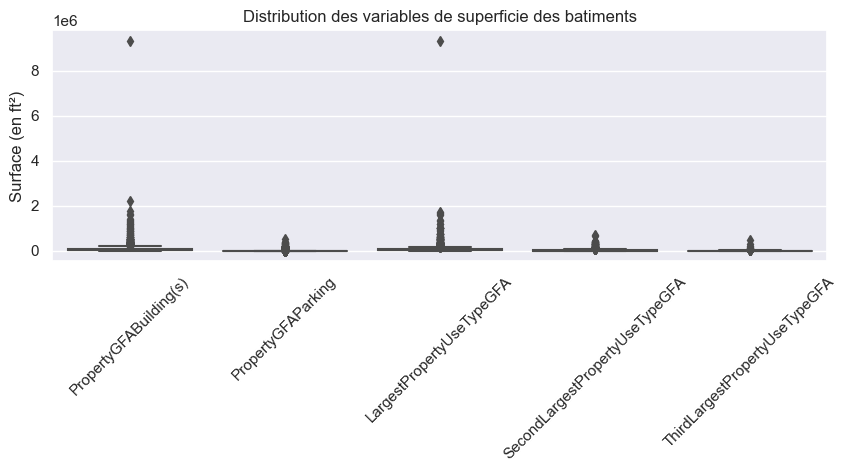

In [514]:
plt.figure(figsize=(10,3))
plt.title("Distribution des variables de superficie des batiments")
sns.boxplot(data=build_df[building_area_columns])
plt.xticks(rotation = 45)
plt.ylabel("Surface (en ft²)")
plt.show()

Il n'y en a qu'un seul, observons duquel il s'agit et si il est légitime.

In [515]:
gfa_max_value = build_df['PropertyGFABuilding(s)'].max()
gfa_max_index = build_df['PropertyGFABuilding(s)'].idxmax()
print("The largest property GFA is " + str(gfa_max_value) + " (index=" + str(gfa_max_index) + ")")

display(build_df.loc[build_df.index == gfa_max_index])

The largest property GFA is 9320156 (index=3274)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111,4,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2,éducatifs,116


Cet outlier est plausible puisqu'il s'agit encore du campus de l'université de Washington, observons donc le même graph en otant cette donnée.

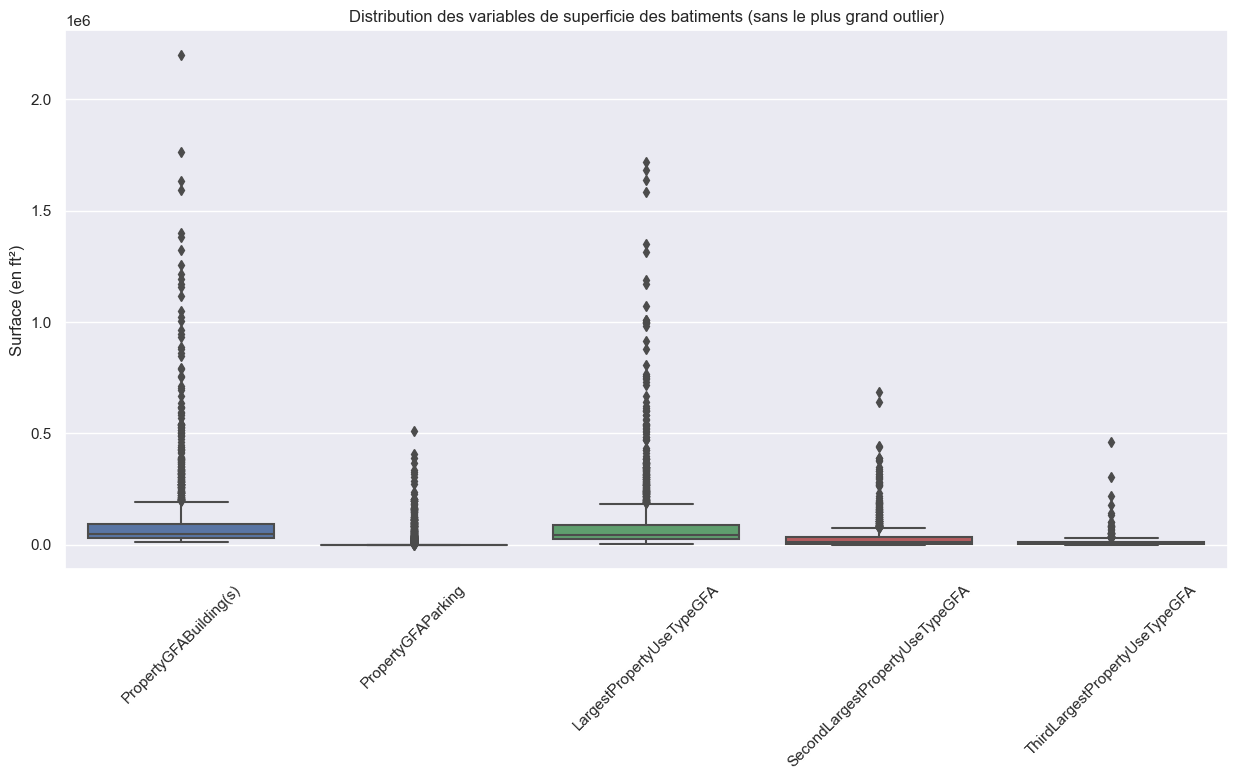

In [516]:

plt.figure(figsize=(15,7))
plt.title("Distribution des variables de superficie des batiments (sans le plus grand outlier)")
sns.boxplot(data=build_df.drop(index=[3274])[building_area_columns])
plt.ylabel("Surface (en ft²)")
plt.xticks(rotation = 45)
plt.show()

N'oublions pas de garder en tête l'objet de notre étude, et pour y parvenir nous allons devoir faire de la regression linéaire donc les nan ne sont pas envisageable ici au du moins le moins possible.

In [517]:
display(build_df[building_area_columns].isna().sum())

PropertyGFABuilding(s)             0   
PropertyGFAParking                 0   
LargestPropertyUseTypeGFA          6   
SecondLargestPropertyUseTypeGFA    792 
ThirdLargestPropertyUseTypeGFA     1285
dtype: int64

Il y a effectivement des données manquantes.  
Malheureusement ce ne sont pas des données simples à remplacer par la moyenne ou la médiane puisqu'elles varient d'une catégorie à l'autre, nous allons donc oter les colonnes correspondantes.

In [518]:
columns_to_remove.extend(['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'])


Comme nous en a parlé Tarik, appliquons les logarithmes pour réduire les effets des outliers:

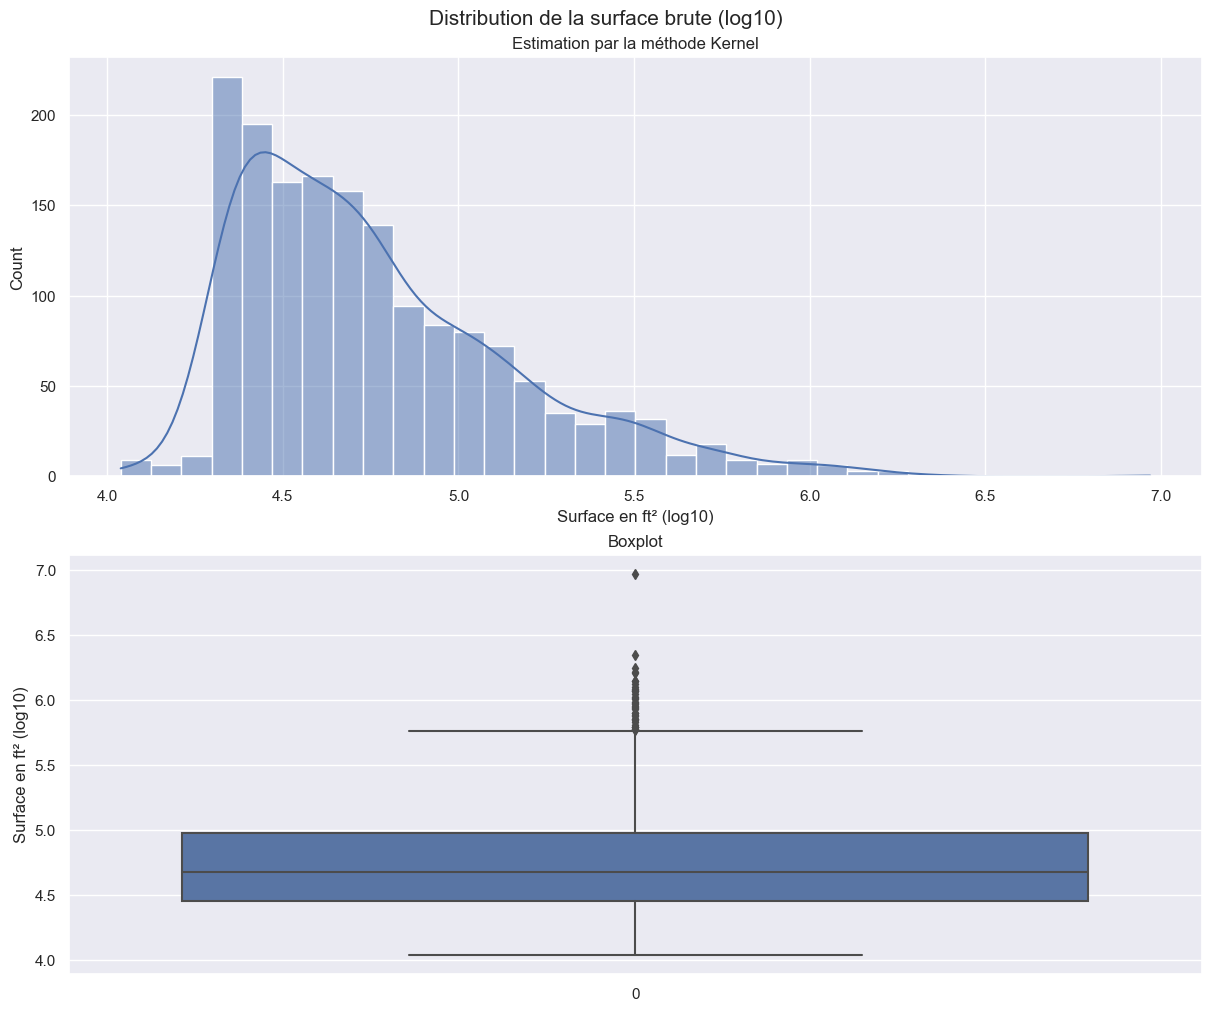

In [519]:
building_gfa_log10 = np.log10(build_df['PropertyGFABuilding(s)'])

fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution de la surface brute (log10)", fontsize=15)

ax[0].set_title("Estimation par la méthode Kernel")
ax[0].set_xlabel("Surface en ft² (log10)")
sns.histplot(data=building_gfa_log10, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Surface en ft² (log10)")
sns.boxplot(data=building_gfa_log10, ax=ax[1])
plt.show()

Grâce à l'exploration je décide d'utiliser les données avec log10 de la variable PropertyGFABuilding(s) pour la suite du projet puisque cela ne fait perdre aucune données tout en les normalisant.

In [520]:
build_df['PropertyGFABuildings(log10)'] = building_gfa_log10

build_df = build_df.drop(columns=['PropertyGFABuilding(s)'])

<span style="font-size: 20px;">Consomation énergétique des batiments</span>

In [521]:
building_energy_columns = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                           'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 
                           'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']

display(build_df[building_energy_columns].describe().T)

,count,mean,std,min,25%,50%,75%,max
SiteEUI(kBtu/sf),1649.0,7.155052e+01,7.399472e+01,0.00000,3.360000e+01,5.140000e+01,8.030000e+01,8.344000e+02
SiteEUIWN(kBtu/sf),1649.0,7.391377e+01,7.493346e+01,0.00000,3.530000e+01,5.350000e+01,8.350000e+01,8.344000e+02
SourceEUI(kBtu/sf),1650.0,1.750495e+02,1.864754e+02,0.00000,7.640000e+01,1.293000e+02,2.003000e+02,2.620000e+03
SourceEUIWN(kBtu/sf),1650.0,1.772357e+02,1.864147e+02,-2.10000,7.922500e+01,1.331000e+02,2.030750e+02,2.620000e+03
SiteEnergyUse(kBtu),1650.0,8.420236e+06,3.039153e+07,0.00000,1.214080e+06,2.498541e+06,6.842116e+06,8.739237e+08
SiteEnergyUseWN(kBtu),1649.0,8.036723e+06,2.214388e+07,0.00000,1.275996e+06,2.642232e+06,7.046346e+06,4.716139e+08
SteamUse(kBtu),1650.0,5.264265e+05,5.559947e+06,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.349435e+08
Electricity(kWh),1650.0,1.717063e+06,6.124271e+06,-33826.80078,2.109838e+05,4.681790e+05,1.409813e+06,1.925775e+08
Electricity(kBtu),1650.0,5.858618e+06,2.089601e+07,-115417.00000,7.198770e+05,1.597427e+06,4.810284e+06,6.570744e+08
NaturalGas(therms),1650.0,1.923091e+04,9.376094e+04,0.00000,0.000000e+00,4.835180e+03,1.471661e+04,2.979090e+06


J'utilise ensuite une matrice de corrélation pour trouver les liens parmi les variables disponibles.

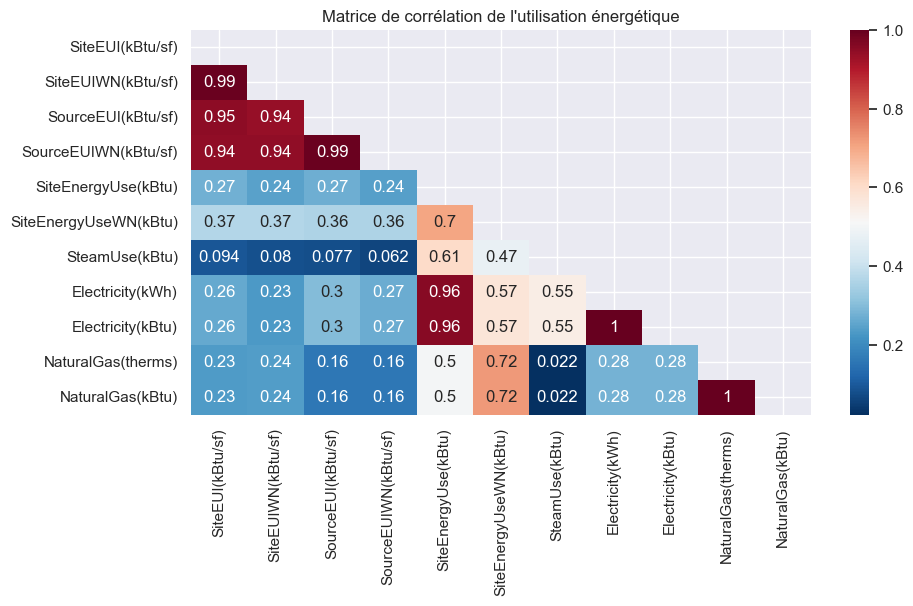

In [522]:
corr = build_df[building_energy_columns].corr()

plt.figure(figsize=(10,5))
plt.title("Matrice de corrélation de l'utilisation énergétique")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.abs(), mask=mask, cmap='RdBu_r', annot=True)
plt.show()

Comme prévisible, certains corrélations sont parfaites:  

* Electricity(kBtu) & Electricity(kWh)
* NaturalGas(kBtu) & NaturalGas(therms)

Et d'autres quasiment parfaites:  

* SiteEUI(kBtu/sf) avec SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf)
* SiteEUIWN(kBtu/sf) avec SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf)  
* SiteEnergyUseWN(kBtu) avec Electricity(kWh) et Electricity(kBtu)  

Pour notre étude, je vais prendre l'indicateur SiteEnergyUse(kBtu) comme target car il n'y a d'après la source de nos données seulement 2 indicateurs référençant la consommation totale d'énergie par propriété, et il s'agit de notre target et du même indicateur mais Weather Normalized, ce qui signifie qu'il prend compte du climat pour les données fournies. Or ici je vais partir du principe que le climat est le même pour toute la ville de Seattle. Donc je garde le premier indicateur qui me parait plus intéressant. 
 
Nous pouvons donc retirer les autres indicateurs pour le nettoyer encore un peu puis afficher la distribution de notre indicateur cible.

In [523]:
columns_to_remove.extend(['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 
                          'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 
                          'NaturalGas(therms)', 'NaturalGas(kBtu)'])

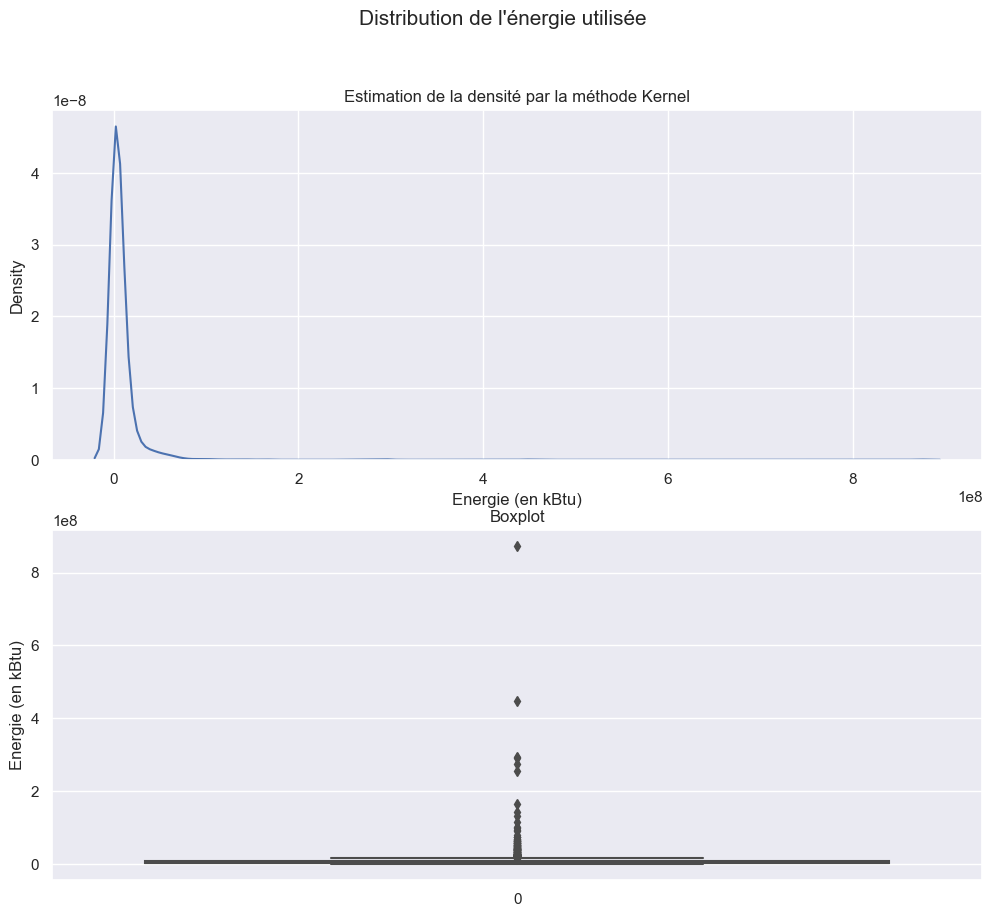

In [524]:
energy_use_col = 'SiteEnergyUse(kBtu)'

fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=False)
plt.suptitle("Distribution de l'énergie utilisée", fontsize=15)

ax[0].set_title("Estimation de la densité par la méthode Kernel")
ax[0].set_xlabel("Energie (en kBtu)")
sns.kdeplot(data=build_df[energy_use_col], ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Energie (en kBtu)")
sns.boxplot(data=build_df[energy_use_col], ax=ax[1])
plt.show()

Avec les graph on peut remarquer deux choses:  
* Une grande concentration de données à 0
* Un outlier très haut sur le boxplot

Observons pourquoi.

In [525]:
display(len(build_df[build_df[energy_use_col] == 0]))
display(build_df[build_df[energy_use_col] == 0])

17

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10)
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,3,CENTRAL,47.62266,-122.30547,1955,1,1,126351,0,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00,éducatifs,61,5.101579
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1,2,51582,0,K-12 School,K-12 School,55166.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438691.6875,1496816.0,0.000000,0.0,False,NaN,Missing Data,NaN,10.43,0.20,éducatifs,27,4.712498
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,1,SOUTHWEST,47.50970,-122.37759,1948,1,2,53352,0,K-12 School,K-12 School,65568.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176088.0938,600813.0,0.000000,0.0,False,NaN,Missing Data,NaN,4.19,0.08,éducatifs,68,4.727151
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,1,DELRIDGE,47.56360,-122.35800,1999,1,3,74468,0,K-12 School,K-12 School,75364.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497706.8125,1698176.0,0.000000,0.0,False,NaN,Missing Data,NaN,11.84,0.16,éducatifs,17,4.871970
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,2,SOUTHEAST,47.57324,-122.29058,1991,1,2,58933,0,K-12 School,K-12 School,60725.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,687906.8750,2347138.0,0.000000,0.0,False,NaN,Missing Data,NaN,16.36,0.28,éducatifs,25,4.770359
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,6,LAKE UNION,47.65464,-122.34912,1991,1,3,66588,0,K-12 School,K-12 School,66588.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616730.8125,2104286.0,0.000000,0.0,False,NaN,Missing Data,NaN,14.67,0.22,éducatifs,25,4.823396
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,6,BALLARD,47.69675,-122.37760,1959,1,1,160270,0,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,43189.171880,4318917.0,False,NaN,Missing Data,NaN,229.38,1.43,éducatifs,57,5.204852
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,3,CENTRAL,47.59796,-122.30415,1963,1,3,136188,0,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,32178.773440,3217877.0,False,NaN,Missing Data,NaN,170.90,1.25,éducatifs,53,5.134139
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,5,NORTH,47.69823,-122.32126,1989,1,2,52792,0,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00,éducatifs,27,4.722568
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,7,DOWNTOWN,47.61195,-122.33167,1

Après des recherches, j'ai trouvé que l'état de Washington a réussi à mettre en place un système qui s'appelle "Net-zero energy building" et qui est appliqué sur tout le réseau "K-12 schools", ces campus on réussi à atteindre une auto-production équivalente à 100% de leur production. Nous pouvons donc les retirer des données puisqu'ils ont déjà atteint l'objectif désiré.
Pour le "Washington State Convention Center", il est membre de l'"US GREEN BUILDING COUNCIL", qui fait de lui un batiment plus qu'éco-responsable, il n'est pas donc surprenant de le retrouver dans cette liste.
Pour le "Welcome Home Society - PriceCo, 13537 Aurora Ave N" je ne trouve pas la raison de cette valeur, je vais donc l'oter du df pour éviter de futures erreurs.
Il en est de même avec "APEX BELLTOWN COOP" qui est un partage de la propriété entre les usagers, peut être que les données ne sont tout simplement pas partagées.

In [526]:
index = build_df[build_df[energy_use_col] == 0].index

build_df = build_df.drop(index)

Observons maintenant l'outlier.

In [527]:
display(build_df[build_df[energy_use_col] > 800000000])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10)
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111,4,9320156,0,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,NaN,Compliant,NaN,11140.56,1.2,éducatifs,116,6.969423


Il s'agit encore du campus de l'Université de Washigton, il s'agit certes d'un outlier mais il n'est pas abérant puisquee c'est cohérent avec le nombre de batiments qu'il contient.  

Maintenant que les données extrêmes ont été vues nous pouvons obeserver l'ensemble de la distribution de manière plus synthétique avec un log.

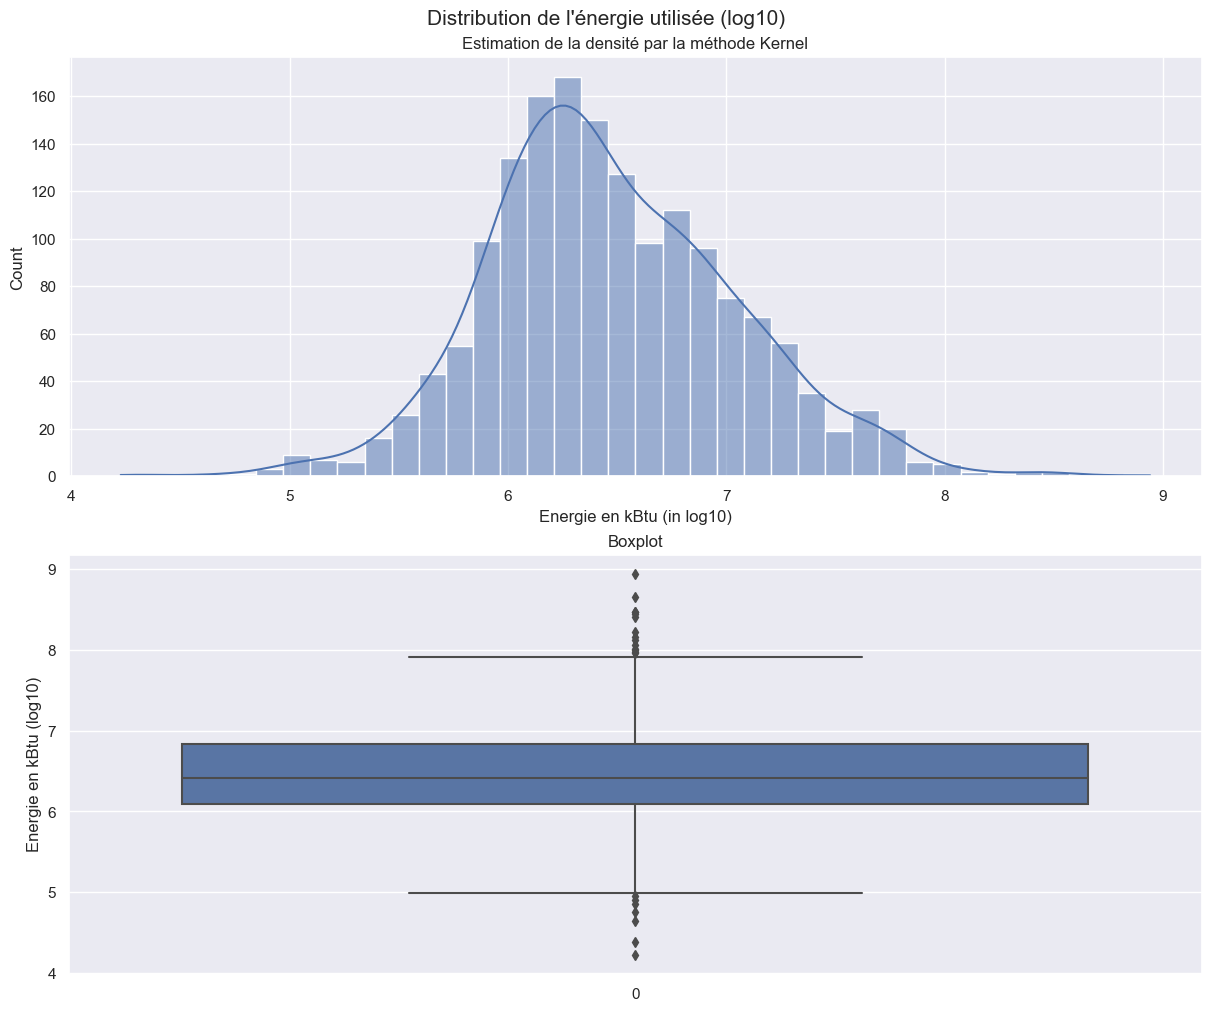

In [528]:
energy_use_log10 = np.log10(build_df[energy_use_col])

fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution de l'énergie utilisée (log10)", fontsize=15)

ax[0].set_title("Estimation de la densité par la méthode Kernel")
ax[0].set_xlabel("Energie en kBtu (in log10)")
sns.histplot(data=energy_use_log10, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Energie en kBtu (log10)")
sns.boxplot(data=energy_use_log10, ax=ax[1])
plt.show()

Comme précedemment nous allons utiliser les données avec log pour la suite.

In [529]:
build_df['SiteEnergyUse(log10)'] = energy_use_log10

build_df = build_df.drop(columns=[energy_use_col])

Nous savons déjà que cet indicateur va nous servir pour la suite donc nous pouvons déjà lui retirer les NaN qui poserons certainement problème pour la suite

In [530]:
energy_use_col = 'SiteEnergyUse(log10)'

print("Nous retirons " + str(build_df[energy_use_col].isna().sum()) + " NaN sur l'indicateur " + energy_use_col)

build_df = build_df.dropna(subset=[energy_use_col])

Nous retirons 2 NaN sur l'indicateur SiteEnergyUse(log10)


<span style="font-size: 20px;">GHGEmissions</span>

In [531]:
building_ghge_columns = ['TotalGHGEmissions', 'GHGEmissionsIntensity']
building_ghge_unit = ['metric ton of co2 equivalent', 'kg of co2 equivalent per sf²']

display(build_df[building_ghge_columns].describe())

,TotalGHGEmissions,GHGEmissionsIntensity
count,1633.000000,1633.000000
mean,185.035419,1.587777
std,759.943414,2.326278
min,-0.800000,-0.020000
25%,20.080000,0.350000
50%,49.170000,0.850000
75%,135.230000,1.820000
max,16870.980000,34.090000


Comme nous le savons pour notre étude nous avons besoin de connaitre les emissions carbones des batiments. Ces deux indicateurs sont ceux correspondants, or nous avons vu précédemment que l'un nous donne le total et l'autre des donneées divisées par la surface brute au sol. Nous n'en conservons qu'un seul pour eviter l'overfitting des données d'entrainement.

In [532]:
columns_to_remove.append('GHGEmissionsIntensity')

Mainenant reproduisons le schémas d'exploration précédent mais pour notre indicateur "TotalGHGEmissions"

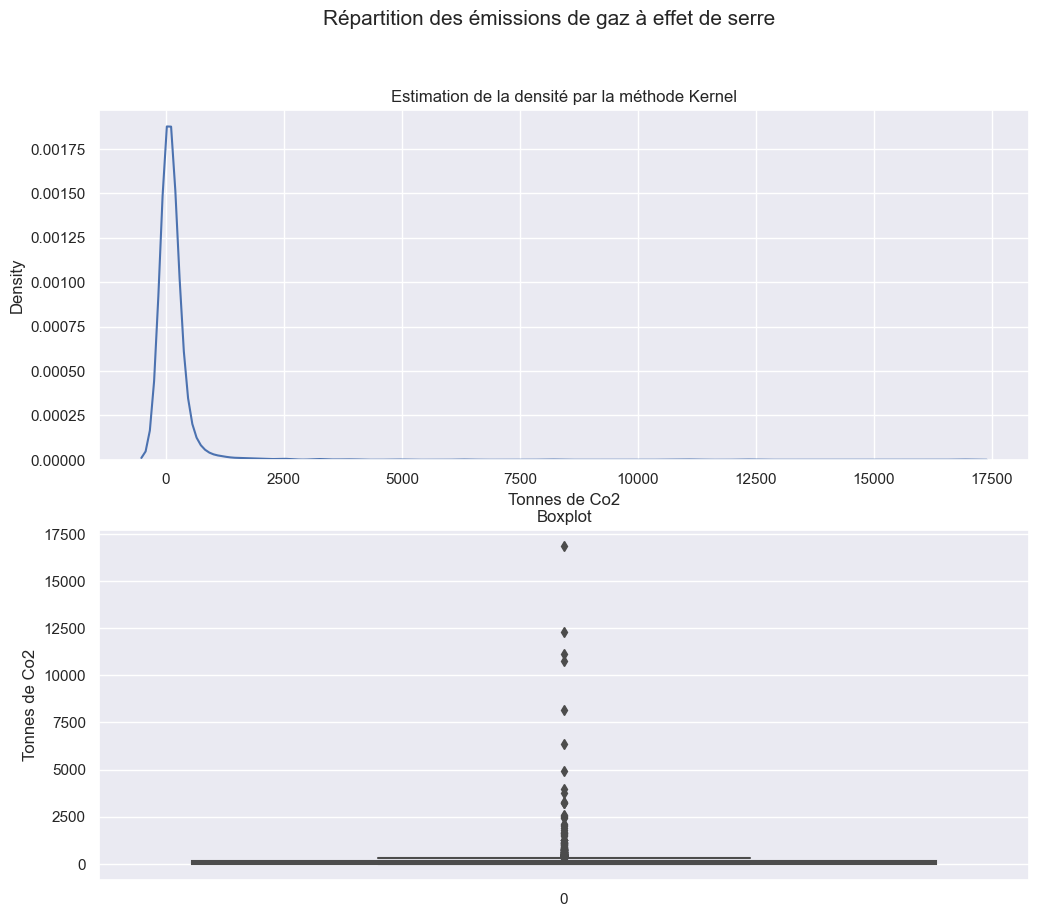

In [533]:
ghge_col = 'TotalGHGEmissions'

# Init figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=False)
plt.suptitle("Répartition des émissions de gaz à effet de serre", fontsize=15)

# Draw distribution
ax[0].set_title("Estimation de la densité par la méthode Kernel")
ax[0].set_xlabel("Tonnes de Co2")
sns.kdeplot(data=build_df[ghge_col], ax=ax[0])

# Draw boxplot
ax[1].set_title("Boxplot")
ax[1].set_ylabel("Tonnes de Co2")
sns.boxplot(data=build_df[ghge_col], ax=ax[1])
plt.show()

Qu'est ce que nous pouvons observer ici?  
Comme précédemment, il y a une concentration des données à 0 ainsi qu'un outlier, même si ici nous allons en comptabiliser au moins 4 (au dessus de 10.000 Tonnes)


In [534]:
display(build_df[build_df[ghge_col] <= 0])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10)
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,Seattle,WA,98119.0,7666201460,7,MAGNOLIA / QUEEN ANNE,47.63718,-122.37734,2008,1,1,57176,0,"Personal Services (Health/Beauty, Dry Cleaning, etc), Retail Store, Supermarket/Grocery Store",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning, etc)",5500.0,NaN,31.0,208.800003,214.100006,0.0,0.0,1.284386e+07,0.0,0.00000,0.0,0.0,0.0,False,NaN,Compliant,NaN,0.0,0.00,magasins,8,4.757214,7.097784
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,2013,1,6,52000,0,Office,Office,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,7.100000,5.000000,2.0,-2.1,2.401321e+05,0.0,-33826.80078,-115417.0,0.0,0.0,False,NaN,Compliant,NaN,-0.8,-0.02,bureaux,3,4.716003,5.534947


Le premier est un supermarché, après des recherches c'est une chaine de magasins qui se définit comme "eco-minded" ce qui rend possible ce taux d'emissions.
Le second est un immeuble de bureaux commerciaux qui est en fait producteur de sa propre énergie et en revend même une partie, c'est cela qui explique son taux négatif!

Nous pouvons donc retirer les deux de la liste car ils ont déjà atteint l'objectif "d'empreinte neutre"

In [535]:
index = build_df[build_df[ghge_col] <= 0].index

build_df = build_df.drop(index)

In [536]:
display(build_df[build_df[ghge_col] > 10000])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,NewBuildingType,Age,PropertyGFABuildings(log10),SiteEnergyUse(log10)
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1,3,494835,0,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09,autres,24,5.694460,8.651651
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9,8,1158691,0,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26,médicaux,16,6.063968,8.467002
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7,14,1765970,0,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97,médicaux,22,6.246983,8.464809
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.656440,-122.310410,1900,111,4,9320156,0,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.000000,246.600006,0.000000,0.0,84985240.0,192577488.0,657074389.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,11140.56,1.20,éducatifs,116,6.969423,8.941474


Dans les outliers nous retrouvons une nouvelle fois le Campus de l'Université de Washigton.
Avec lui se trouvent deux hopitaux, ce qui semble correct puisque ce sont des batiments qui sont en permanence en activité.
L'outlier restant dans la liste est un site de manufacture de Boeing de plusieurs hectares, anciennement il s'agissait d'un campus de fabrication de Boeing pendant 2nde Guerre Mondiale dissimulé comme une "fausse ville" avec de fausses rues, batiments etc. Il aurait été possible que ces données soient correctes mais en observant la surface brute au sol, elle parait infime au vu de la consommation, je la considère donc comme une valeur abérante et je la retire.

In [537]:
build_df = build_df.drop(35)

Comme précédemment, je vais observer les données avec log pour tenter d'avoir une meilleure vue d'ensemble.

Exception ignored in: <generator object Cycler.__iter__ at 0x0000025F45DDCC10>
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\cycler.py", line 239, in __iter__
    def __iter__(self):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1363, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 1664, in _pydevd_bundle.pydevd_cython.ThreadTracer.__call__
  File "C:\ProgramData\anaconda3\lib\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\pydev_is_thread_alive.py", line 9, in is_thread_alive
    def is_thread_alive(t):
KeyboardInterrupt: 


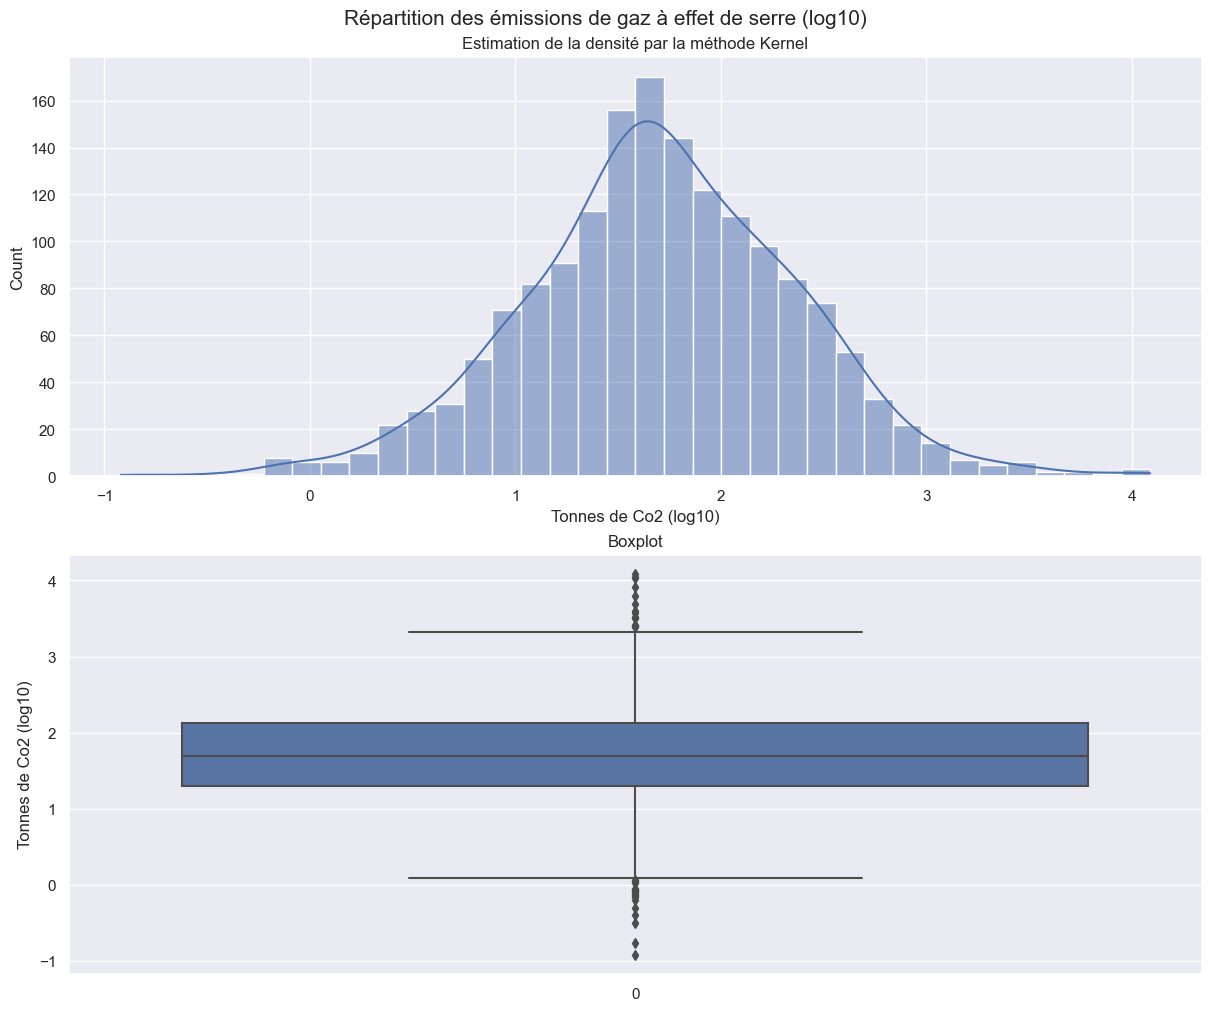

In [538]:
ghge_log10 = np.log10(build_df[ghge_col])

fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Répartition des émissions de gaz à effet de serre (log10)", fontsize=15)

ax[0].set_title("Estimation de la densité par la méthode Kernel")
ax[0].set_xlabel("Tonnes de Co2 (log10)")
sns.histplot(data=ghge_log10, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Tonnes de Co2 (log10)")
sns.boxplot(data=ghge_log10, ax=ax[1])
plt.show()

Comme précédemment, je vais utiliser cet indicateur (log10) pour la suite de l'étude donc je retire l'ancien et garde celui-ci.
J'en profite aussi pour y supprimer les NaN.

In [540]:
build_df['TotalGHGEmissions(log10)'] = ghge_log10

build_df = build_df.drop(columns=[ghge_col])

ghge_col = 'TotalGHGEmissions(log10)'

print("Nous retirons " + str(build_df[ghge_col].isna().sum()) + " NaN sur l'indicateur " + ghge_col)

build_df = build_df.dropna(subset=[ghge_col])

Nous retirons 0 NaN sur l'indicateur TotalGHGEmissions(log10)


<span style="font-size: 20px;">ENERGY STAR score</span>

Le score ENERGY STAR est donné par une Agence de Protection Environnementale allant de 1 à 100, plus la note est élevée plus la performance énergétique globale d'une propriété est bonne pour l'environnement. Un score de 50 représente la médiane nationale.

In [541]:
building_star_columns = ['ENERGYSTARScore','YearsENERGYSTARCertified']

display(build_df[building_star_columns].describe())
display(build_df[building_star_columns].isna().sum())

,ENERGYSTARScore
count,1064.000000
mean,65.838346
std,28.265576
min,1.000000
25%,49.000000
50%,74.000000
75%,89.000000
max,100.000000


ENERGYSTARScore             566 
YearsENERGYSTARCertified    1533
dtype: int64

In [542]:
display(build_df['YearsENERGYSTARCertified'].value_counts())

2016                    11
2017                    5 
2013                    4 
2009                    4 
20162015                4 
                       .. 
2017201520142013        1 
201620152012            1 
2012201020072006        1 
20152014201220112009    1 
20162015201020092008    1 
Name: YearsENERGYSTARCertified, Length: 64, dtype: int64

Cette variable ne semble pas réellement utile donc je la supprime, certes les années dans le classement évoluent mais elles ne sont pas représentatives de quoi que ce soit, il n'y a pas d'évolution visible au fil des années.

In [543]:
columns_to_remove.append('YearsENERGYSTARCertified')

Maintenant comme nous avons pu le faire précédemment, affichons la répartition de l'indicateur.

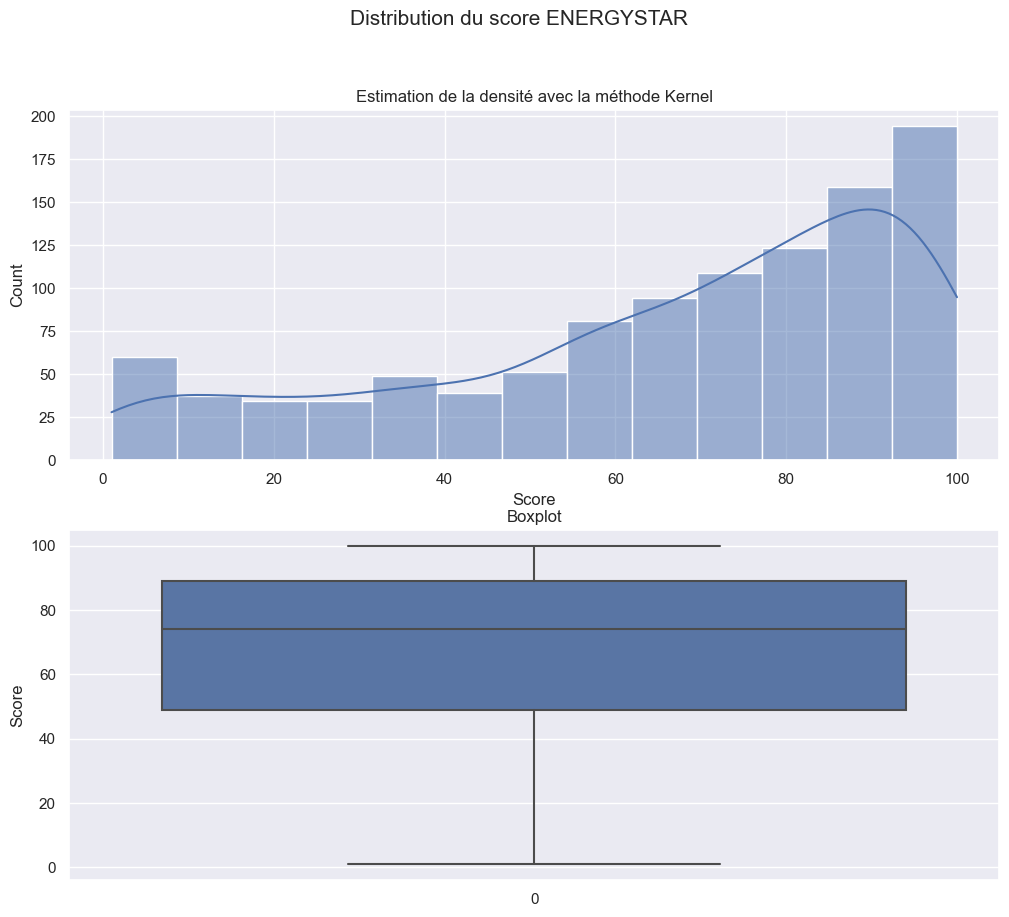

In [544]:
energystar_col = 'ENERGYSTARScore'

fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=False)
plt.suptitle("Distribution du score ENERGYSTAR", fontsize=15)

ax[0].set_title("Estimation de la densité avec la méthode Kernel")
ax[0].set_xlabel("Score")
sns.histplot(data=build_df[energystar_col], kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
sns.boxplot(data=build_df[energystar_col], ax=ax[1])
plt.show()

Ce graph est utilisable et intéressant mais comme nous l'avons vu précédemment il manque un nombre assez conséquent de données.  
Je vais donc utiliser la méthode d'imputation KNN pour les compléter.

In [546]:
knn_df = build_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

n_neighbors = 6

print("KNNImputer avec n_neighbors=" + str(n_neighbors))
imputer = KNNImputer(n_neighbors=n_neighbors)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)

KNNImputer avec n_neighbors=6


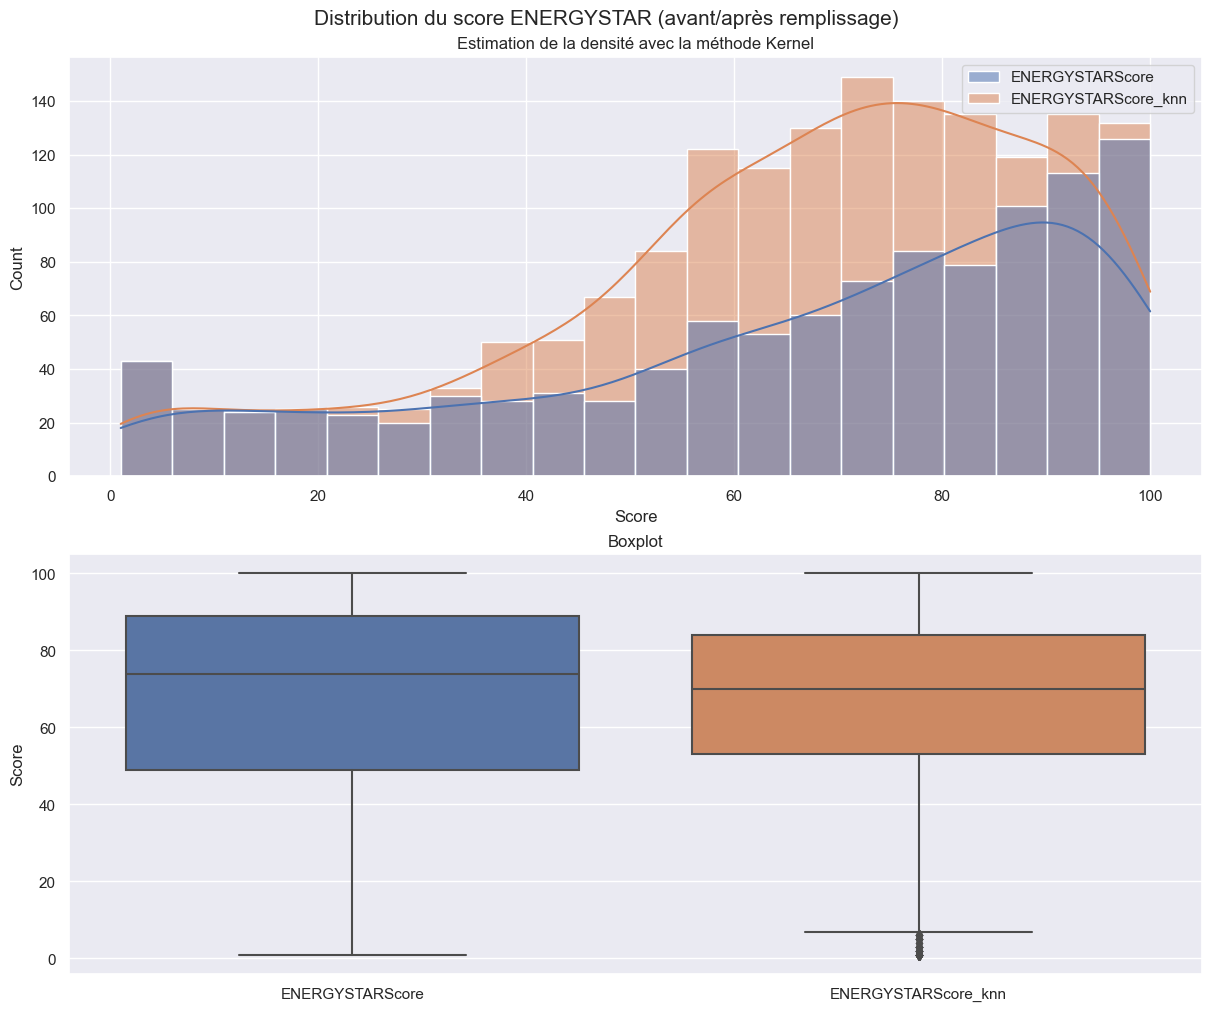

In [547]:
compare_df = pd.concat([build_df[energystar_col], knn_df[energystar_col].rename('ENERGYSTARScore_knn')], axis=1)


fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution du score ENERGYSTAR (avant/après remplissage)", fontsize=15)

ax[0].set_title("Estimation de la densité avec la méthode Kernel")
ax[0].set_xlabel("Score")
sns.histplot(data=compare_df, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("")
sns.boxplot(data=compare_df, ax=ax[1])
plt.show()

Avec le knn = 6 on obtient les meilleurs résultats donc nous allons conserver et remplacer les anciens NaN.

In [550]:
build_df[energystar_col] = knn_df[energystar_col].to_numpy()

print("Remaining NaN values : ", build_df[energystar_col].isna().sum())

Remaining NaN values :  0


<span style="font-size: 20px;">Reste des données</span>

La colonne DataYear est exclusivement remplie de valeurs 2016 puisque c'est la base de donnée qui nous est fournie on peut la retirer.

In [551]:
print(build_df['DataYear'].unique())
columns_to_remove.append('DataYear')

[2016]


La colonne ListOfAllPropertyUseType n'est pas non plus nécessaire une fois l'exploration effectuée on peut aussi l'oter.

In [552]:
columns_to_remove.append('ListOfAllPropertyUseTypes')

Je retire également les colonnes DefaultData et Outlier car les données qu'elles contiennent peuvent fausser la suite de l'étude.
Et c'est aussi parce que la colonne outlier ne donne pas de nouvelle info utile, on peut très bien observer si une valeur est un outlier ou non.
La colonne CompilanceStatus pourrait servir pour une projection mais je n'en ai pas besoin pour l'instant.
La colonne Comments est entièrement vide donc je me permets de l'écarter elle aussi.

In [556]:
columns_to_remove.append('Outlier')
columns_to_remove.append('DefaultData')
columns_to_remove.append('ComplianceStatus')
columns_to_remove.append('Comments')

<span style="font-size: 20px;">Mise à l'écart des colonnes sélectionnées</span>


In [561]:
with pd.option_context("display.max_rows", None):
    print(columns_to_remove)

['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'City', 'State', 'Address', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'YearBuilt', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified', 'DataYear', 'ListOfAllPropertyUseTypes', 'Outlier', 'DefaultData', 'Outlier', 'DefaultData', 'ComplianceStatus', 'Outlier', 'DefaultData', 'ComplianceStatus', 'Comments', 'Outlier', 'DefaultData', 'ComplianceStatus', 'Comments']


In [519]:
build_df = build_df.drop(columns=columns_to_remove)

print("The remaining columns after cleaning are : ")
print(build_df.columns)

The remaining columns after cleaning are : 
Index(['DataYear', 'PropertyName', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'NewBuildingType'],
      dtype='object')


<span style="font-size: 20px;">One hot encoding</span>

Etant donné que les algo de ML ne fonctionnent pas avec des variables non numériques nous utilisons l'encodeur de Scikit-Learn pour classer les variables.

In [564]:
encoded_df = pd.get_dummies(build_df, prefix=[nbhd_col, 'BuildType'], columns=[nbhd_col, new_type_col])
encoded_df = encoded_df.reindex(sorted(encoded_df.columns), axis=1)
display(encoded_df.sample(10))

,Age,BuildType_autres,BuildType_bureaux,BuildType_hoteliers,BuildType_industries,BuildType_magasins,BuildType_médicaux,BuildType_religieux,BuildType_restauration,BuildType_éducatifs,ENERGYSTARScore,Latitude,Longitude,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,NumberofBuildings,NumberofFloors,PropertyGFABuildings(log10),PropertyGFAParking,PropertyName,SiteEnergyUse(log10),TotalGHGEmissions(log10)
2381,95,1,0,0,0,0,0,0,0,0,60.888889,47.62643,-122.33946,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,4.419956,0,Art Marble 21,6.548738,2.067963
1509,63,0,0,0,0,1,0,0,0,0,40.000000,47.53747,-122.28308,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.416507,0,Safeway 0219 - Othello St,6.881923,2.239925
2185,96,0,1,0,0,0,0,0,0,0,80.000000,47.59508,-122.33378,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,4.304275,0,820,5.760554,0.604226
67,6,0,1,0,0,0,0,0,0,0,96.000000,47.62424,-122.33646,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5.500107,0,City Place III - SEDO,7.139752,2.142546
1314,107,0,1,0,0,0,0,0,0,0,100.000000,47.61230,-122.34611,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5,4.825426,0,U0010 - Union Stables,6.213299,1.150142
1258,54,0,0,0,0,0,0,1,0,0,55.000000,47.60821,-122.32960,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,4.577446,0,First Presbyterian Church of Seattle,6.391990,2.091350
637,66,0,0,0,0,0,0,0,0,1,92.000000,47.57950,-122.38723,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4.786631,0,Lafayette Elementary,6.384662,1.980185
2855,12,1,0,0,0,0,0,0,0,0,72.666667,47.62375,-122.30693,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,4.647696,0,Capitol Court,6.144973,1.497897
2407,11,1,0,0,0,0,0,0,0,0,68.000000,47.60050,-122.33514,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5,4.760422,0,Compass Housing Alliance - Pioneer Square,6.844088,2.349005
205,91,0,0,0,0,1,0,0,0,0,93.000000,47.61229,-122.33629,0,0,0,1,0,0,0,0,0,0,0,0,0,1,10,5.841015,0,Nordstrom 001,7.602742,2.600090


Affichons les valeurs manquantes pour verifier si nos données vont être utilisables pour les regressions.

In [574]:
print(encoded_df.isna().sum().sum())

0


Il n'y en a effectivement aucune, c'est parfait.  
Nous pouvons maintenant enregistrer le dataframe en fichier en .csv pour pouvoir le réutiliser par la suite.

In [582]:
export_df = encoded_df.copy()
export_filename = "project4_data_cleaned.csv"

export_path = project_path + "/" + export_filename

export_df.to_csv(export_path, index=False)

<span style="font-size: 20px;">Brouillon</span>

KNNImputer avec n_neighbors=3


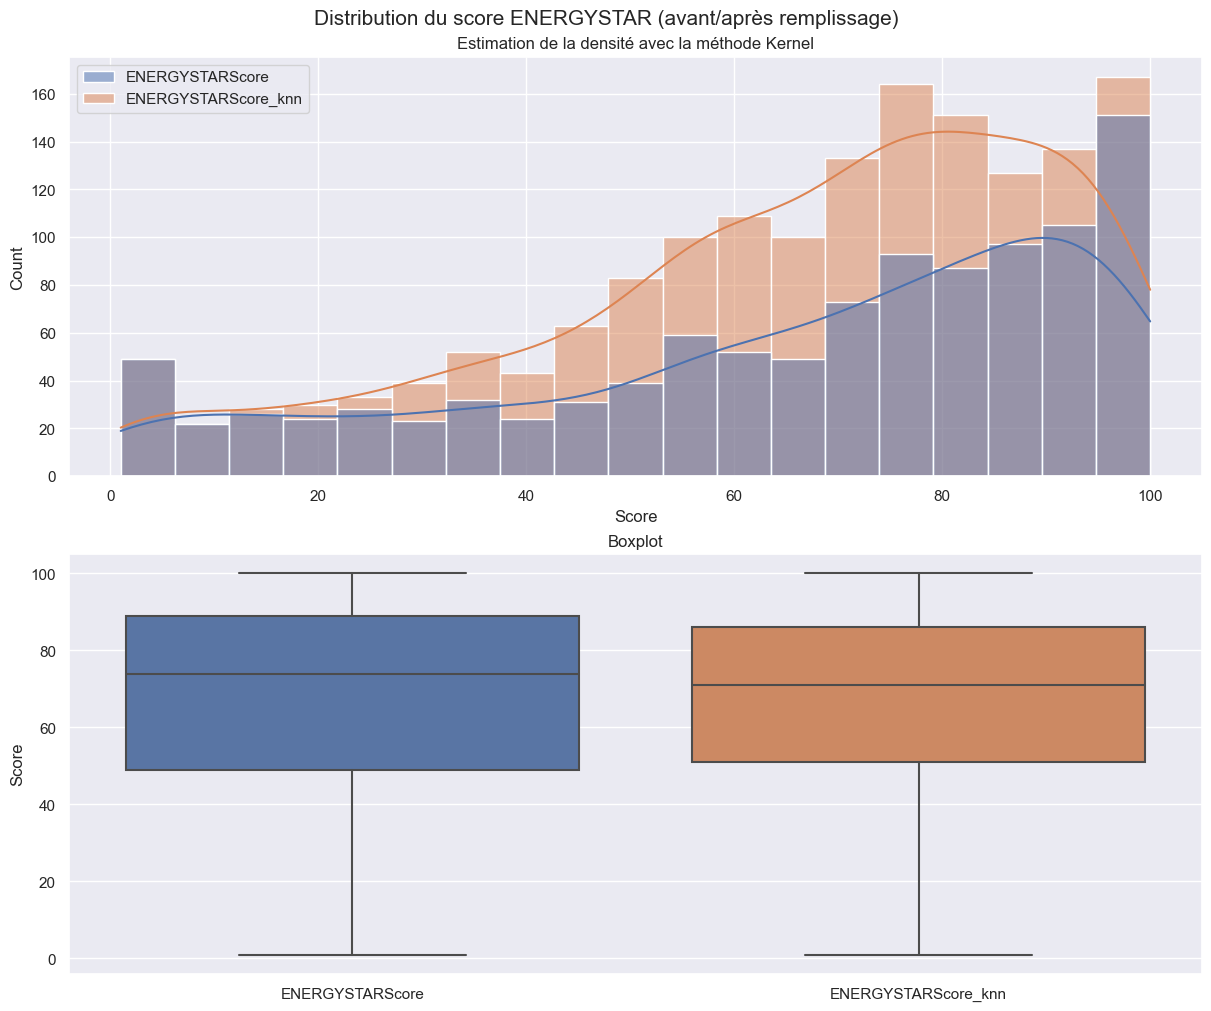

In [ ]:
knn_df = build_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

n_neighbors = 5

print("KNNImputer avec n_neighbors=" + str(n_neighbors))
imputer = KNNImputer(n_neighbors=n_neighbors)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)


compare_df = pd.concat([build_df[energystar_col], knn_df[energystar_col].rename('ENERGYSTARScore_knn')], axis=1)


fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution du score ENERGYSTAR (avant/après remplissage)", fontsize=15)

ax[0].set_title("Estimation de la densité avec la méthode Kernel")
ax[0].set_xlabel("Score")
sns.histplot(data=compare_df, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("")
sns.boxplot(data=compare_df, ax=ax[1])
plt.show()

KNNImputer avec n_neighbors=3


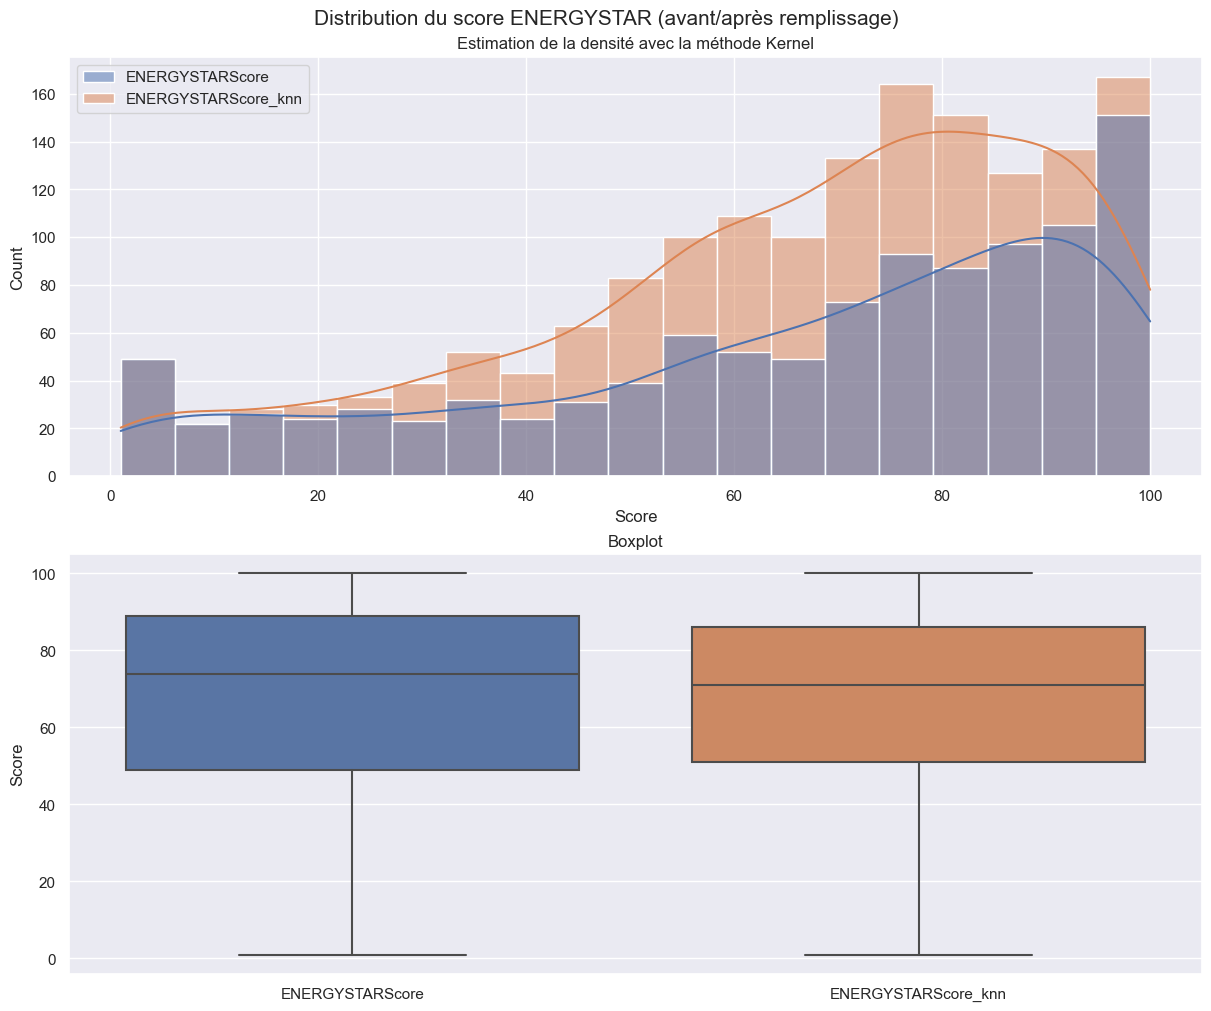

In [548]:
knn_df = build_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

n_neighbors = 3

print("KNNImputer avec n_neighbors=" + str(n_neighbors))
imputer = KNNImputer(n_neighbors=n_neighbors)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)


compare_df = pd.concat([build_df[energystar_col], knn_df[energystar_col].rename('ENERGYSTARScore_knn')], axis=1)


fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution du score ENERGYSTAR (avant/après remplissage)", fontsize=15)

ax[0].set_title("Estimation de la densité avec la méthode Kernel")
ax[0].set_xlabel("Score")
sns.histplot(data=compare_df, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("")
sns.boxplot(data=compare_df, ax=ax[1])
plt.show()

KNNImputer avec n_neighbors=9


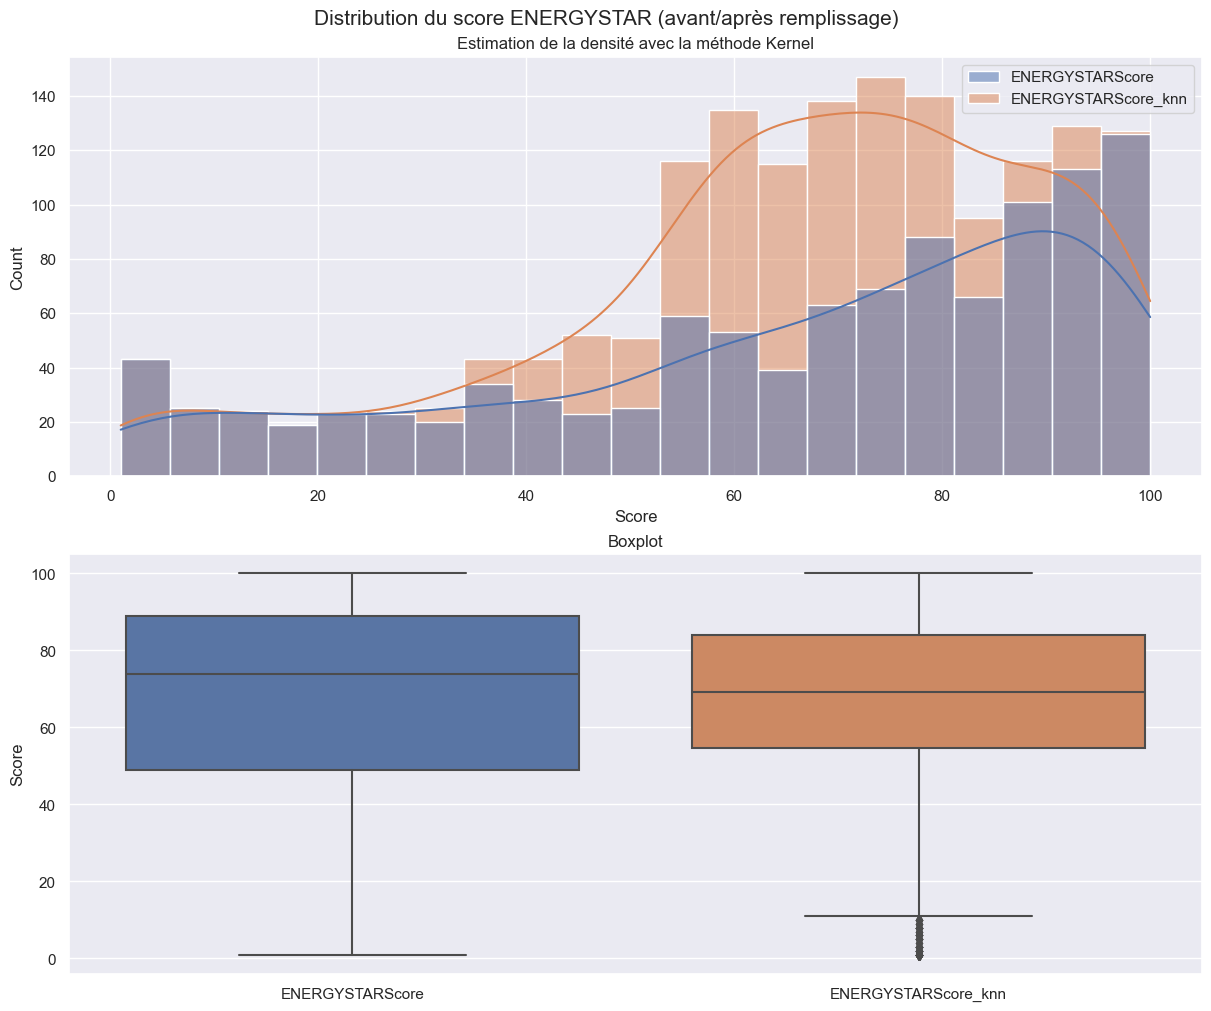

In [549]:
knn_df = build_df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

n_neighbors = 9

print("KNNImputer avec n_neighbors=" + str(n_neighbors))
imputer = KNNImputer(n_neighbors=n_neighbors)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df), columns=knn_df.columns)


compare_df = pd.concat([build_df[energystar_col], knn_df[energystar_col].rename('ENERGYSTARScore_knn')], axis=1)


fig, ax = plt.subplots(2, 1, figsize=(12, 10), constrained_layout=True)
plt.suptitle("Distribution du score ENERGYSTAR (avant/après remplissage)", fontsize=15)

ax[0].set_title("Estimation de la densité avec la méthode Kernel")
ax[0].set_xlabel("Score")
sns.histplot(data=compare_df, kde=True, ax=ax[0])

ax[1].set_title("Boxplot")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("")
sns.boxplot(data=compare_df, ax=ax[1])
plt.show()

BROUILLONS

In [ ]:
# Split the data into features (X) and target (y)
X = knn_df.drop('fraud', axis=1)
y = knn_df['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyError: "['fraud'] not found in axis"

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(raw_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'},
            annot=True,  # Ajouter les valeurs dans les cellules
            fmt='d',     # Format des valeurs en entiers
            annot_kws={'color': 'black'},  # Couleur du texte d'annotation
            linewidths=0.5,  # Largeur des lignes entre les cellules
            linecolor='gray',  # Couleur des lignes entre les cellules
            cbar=True)  # Afficher la barre de couleur à droite

ax.set_facecolor('lightgray')  # Définir la couleur de fond en gris clair
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000025F10F216C0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025F10F39A20> (for post_execute):


KeyboardInterrupt: 

In [ ]:
missing_counts = raw_data.isna().sum()
sorted_columns = missing_counts.sort_values(ascending=True).index

sns.set(style="darkgrid")


plt.figure(figsize=(20, 1))
plt.title("Données présentes par colonne", size=15)

plot = sns.barplot(y=raw_data.shape[0] - raw_data[sorted_columns].isna().sum().values, x=sorted_columns)
plot.set_xticklabels(sorted_columns, rotation=90, size=12)

# Placer les étiquettes personnalisées à droite
custom_labels = [0, 675, 1350, 2025, 2700, 3376]
plot.tick_params(axis='y', labelright=True)
plot.set_yticks(custom_labels)
plot.set_yticklabels([str(label) for label in custom_labels], size=12)
plot.tick_params(axis="y", labelleft=False)

plot.yaxis.get_ticklines()[0].set_zorder(2)

plt.subplots_adjust(top=7)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["bottom"].set_visible(False)
plot.spines["left"].set_visible(False)

# Ajouter les valeurs au-dessus de chaque colonne
for i, bar in enumerate(plot.patches):
    height = bar.get_height()
    plot.annotate(str(int(height)), rotation = 45,xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # Position du texte (3 points au-dessus de la barre)
                  textcoords="offset points",
                  ha='center', va='bottom', size=10)

for label in custom_labels[1:]:
    plot.axhline(label, color='white', linestyle='-', linewidth=0.5)

plt.show()
